# Lab 7- Data Analysis

Exercises 1-4 are to be completed by October 25th. The remaider of the lab is due November 1st. Before leaving lab today, everyone must download the dataset.

## Exercise 2: Download SUSY Dataset

The information about the dataset can be found at the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php). We'll start with the [SUSY Dataset](https://archive.ics.uci.edu/ml/datasets/SUSY).

### Download
In a terminal, download the data directly from the source and then decompress it. For example:

* To download:
    * On Mac OS:
    `curl http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz > SUSY.csv.gz`

    * In linux:
    `wget http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz`

* To uncompress:
`gunzip SUSY.csv.gz`

### Download dataset

In [1]:
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz

--2024-11-02 03:53:00--  http://archive.ics.uci.edu/ml/machine-learning-databases/00279/SUSY.csv.gz
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘SUSY.csv.gz’

SUSY.csv.gz             [    <=>             ] 879.65M  26.2MB/s    in 26s     

2024-11-02 03:53:27 (33.3 MB/s) - ‘SUSY.csv.gz’ saved [922377711]



In [2]:
!gunzip SUSY.csv.gz

In [3]:
ls -lh

total 2.3G
drwxr-xr-x 1 root root 4.0K Oct 31 13:28 sample_data/
-rw-r--r-- 1 root root 2.3G Nov  2 03:53 SUSY.csv


The data is provided as a comma separated file.

In [4]:
filename="SUSY.csv"
# print out the first 5 lines using unix head command
!head -5  "SUSY.csv"

0.000000000000000000e+00,9.728614687919616699e-01,6.538545489311218262e-01,1.176224589347839355e+00,1.157156467437744141e+00,-1.739873170852661133e+00,-8.743090629577636719e-01,5.677649974822998047e-01,-1.750000417232513428e-01,8.100607395172119141e-01,-2.525521218776702881e-01,1.921887040138244629e+00,8.896374106407165527e-01,4.107718467712402344e-01,1.145620822906494141e+00,1.932632088661193848e+00,9.944640994071960449e-01,1.367815494537353516e+00,4.071449860930442810e-02
1.000000000000000000e+00,1.667973041534423828e+00,6.419061869382858276e-02,-1.225171446800231934e+00,5.061022043228149414e-01,-3.389389812946319580e-01,1.672542810440063477e+00,3.475464344024658203e+00,-1.219136357307434082e+00,1.295456290245056152e-02,3.775173664093017578e+00,1.045977115631103516e+00,5.680512785911560059e-01,4.819284379482269287e-01,0.000000000000000000e+00,4.484102725982666016e-01,2.053557634353637695e-01,1.321893453598022461e+00,3.775840103626251221e-01
1.000000000000000000e+00,4.4483992457389831

## Reducing the dataset

This is a rather large dataset. If you have trouble loading it, we can easily make a new file with less data.

Here we look at the size of the data

In [5]:
!ls -lh

total 2.3G
drwxr-xr-x 1 root root 4.0K Oct 31 13:28 sample_data
-rw-r--r-- 1 root root 2.3G Nov  2 03:53 SUSY.csv


We see that we have 5 million datapoints.

In [6]:
!wc -l SUSY.csv

5000000 SUSY.csv


We create a new file of the first half million. This is sufficient for our needs in this lab:

In [7]:
!head -500000 SUSY.csv > SUSY-small.csv

In [8]:
ls -lh

total 2.5G
drwxr-xr-x 1 root root 4.0K Oct 31 13:28 sample_data/
-rw-r--r-- 1 root root 2.3G Nov  2 03:53 SUSY.csv
-rw-r--r-- 1 root root 228M Nov  2 03:54 SUSY-small.csv


In [9]:
! wc -l SUSY-small.csv

500000 SUSY-small.csv


Use this file for the rest of the lab to make this run faster.

### First Look

Each row represents a LHC collision event. Each column contains some observable from that event. The variable names are ([based on documentation](https://archive.ics.uci.edu/ml/datasets/SUSY)):

In [14]:
VarNames=["signal", "l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi", "MET_rel", "axial_MET", "M_R", "M_TR_2", "R", "MT2", "S_R", "M_Delta_R", "dPhi_r_b", "cos_theta_r1"]

Some of these variables represent the "raw" kinematics of the observed final state particles, while others are "features" that are derived from these raw quantities:

In [15]:
RawNames=["l_1_pT", "l_1_eta","l_1_phi", "l_2_pT", "l_2_eta", "l_2_phi", "MET", "MET_phi"]
FeatureNames=list(set(VarNames[1:]).difference(RawNames))

In [16]:
RawNames

['l_1_pT',
 'l_1_eta',
 'l_1_phi',
 'l_2_pT',
 'l_2_eta',
 'l_2_phi',
 'MET',
 'MET_phi']

In [ ]:
FeatureNames

['S_R',
 'R',
 'MET_rel',
 'cos_theta_r1',
 'M_Delta_R',
 'M_R',
 'MT2',
 'dPhi_r_b',
 'M_TR_2',
 'axial_MET']

We will use pandas to read in the file, and matplotlib to make plots. The following ensures pandas is installed and sets everything up:

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Now we can read the data into a pandas dataframe:

In [18]:
filename = "SUSY.csv"
df = pd.read_csv(filename, dtype='float64', names=VarNames)

You can see the data in Jupyter by just evaluateing the dataframe:

In [ ]:
df

,signal,l_1_pT,l_1_eta,l_1_phi,l_2_pT,l_2_eta,l_2_phi,MET,MET_phi,MET_rel,axial_MET,M_R,M_TR_2,R,MT2,S_R,M_Delta_R,dPhi_r_b,cos_theta_r1
0,0.0,0.972861,0.653855,1.176225,1.157156,-1.739873,-0.874309,0.567765,-0.175000,0.810061,-0.252552,1.921887,0.889637,0.410772,1.145621,1.932632,0.994464,1.367815,0.040714
1,1.0,1.667973,0.064191,-1.225171,0.506102,-0.338939,1.672543,3.475464,-1.219136,0.012955,3.775174,1.045977,0.568051,0.481928,0.000000,0.448410,0.205356,1.321893,0.377584
2,1.0,0.444840,-0.134298,-0.709972,0.451719,-1.613871,-0.768661,1.219918,0.504026,1.831248,-0.431385,0.526283,0.941514,1.587535,2.024308,0.603498,1.562374,1.135454,0.180910
3,1.0,0.381256,-0.976145,0.693152,0.448959,0.891753,-0.677328,2.033060,1.533041,3.046260,-1.005285,0.569386,1.015211,1.582217,1.551914,0.761215,1.715464,1.492257,0.090719
4,1.0,1.309996,-0.690089,-0.676259,1.589283,-0.693326,0.622907,1.087562,-0.381742,0.589204,1.365479,1.179295,0.968218,0.728563,0.000000,1.083158,0.043429,1.154854,0.094859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4999995,1.0,0.853325,-0.961783,-1.487277,0.678190,0.493580,1.647969,1.843867,0.276954,1.025105,-1.486535,0.892879,1.684429,1.674084,3.366298,1.046707,2.646649,1.389226,0.364599
4999996,0.0,0.951581,0.139370,1.436884,0.880440,-0.351948,-0.740852,0.290863,-0.732360,0.001360,0.257738,0.802871,0.545319,0.602730,0.002998,0.748959,0.401166,0.443471,0.239953
4999997,0.0,0.840389,1.419162,-1.218766,1.195631,1.695645,0.663756,0.490888,-0.509186,0.704289,0.045744,0.825015,0.723530,0.778236,0.752942,0.838953,0.614048,1.210595,0.026692
4999998,1.0,1.784218,-0.833565,-0.560091,0.953342,-0.688969,-1.428233,2.660703,-0.861344,2.116892,2.906151,1.232334,0.952444,0.685846,0.000000,0.781874,0.676003,1.197807,0.093689


The first column stores the "truth" label of whether an event was signal or not. Pandas makes it easy to create dataframes that store only the signal or background events:

In [ ]:
df_sig=df[df.signal==1]
df_bkg=df[df.signal==0]

The following example plots the signal and background distributions of every variable. Note that we use VarNames[1:] to skip the first variable, which was the true label.

l_1_pT


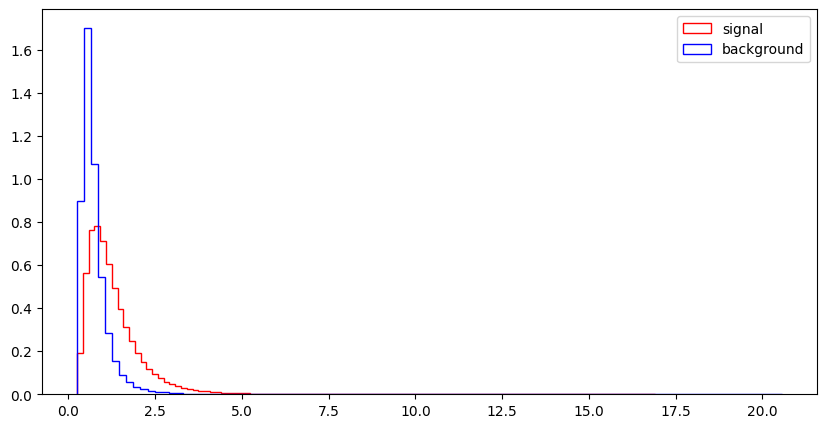

l_1_eta


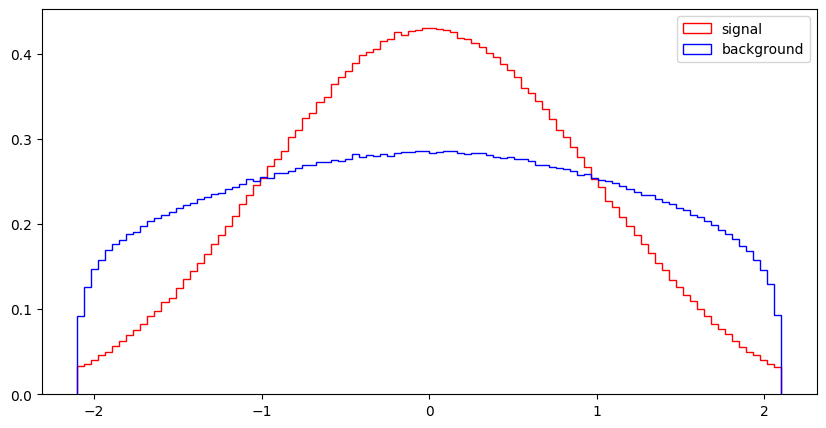

l_1_phi


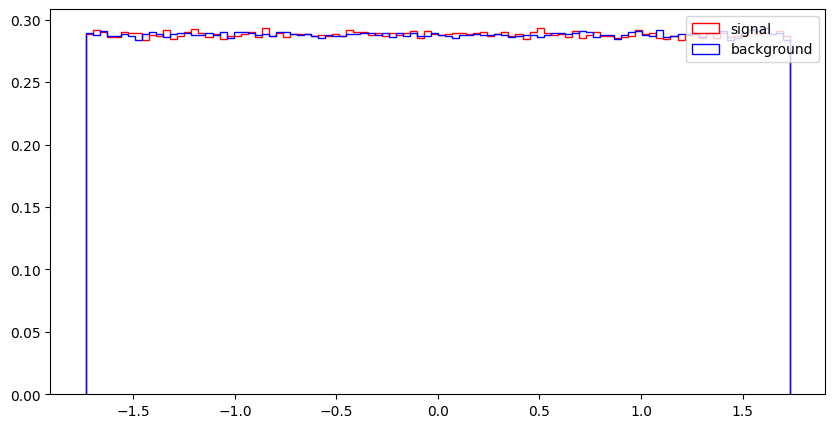

l_2_pT


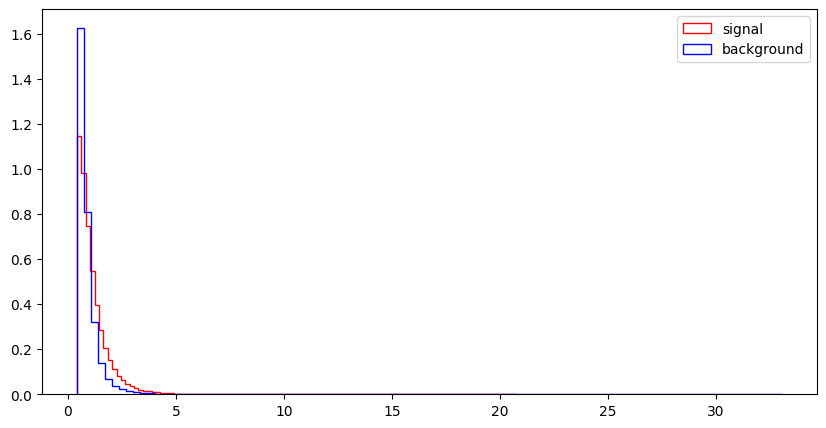

l_2_eta


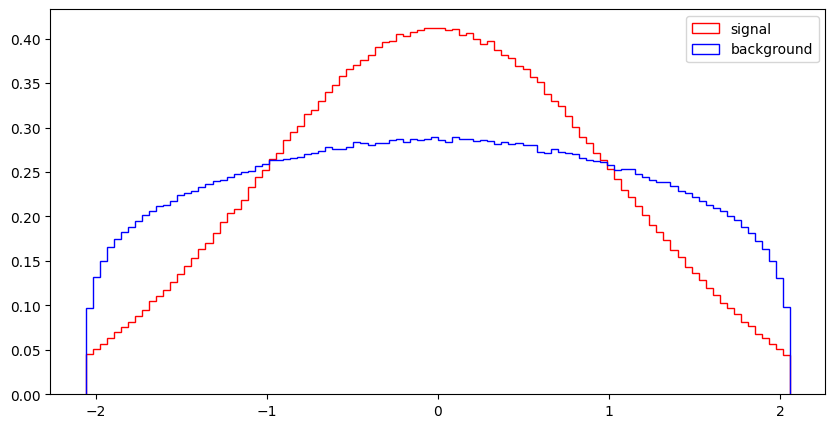

l_2_phi


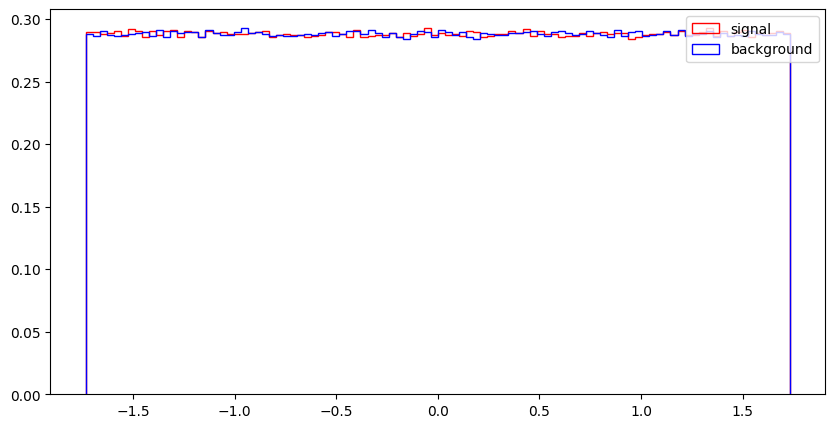

MET


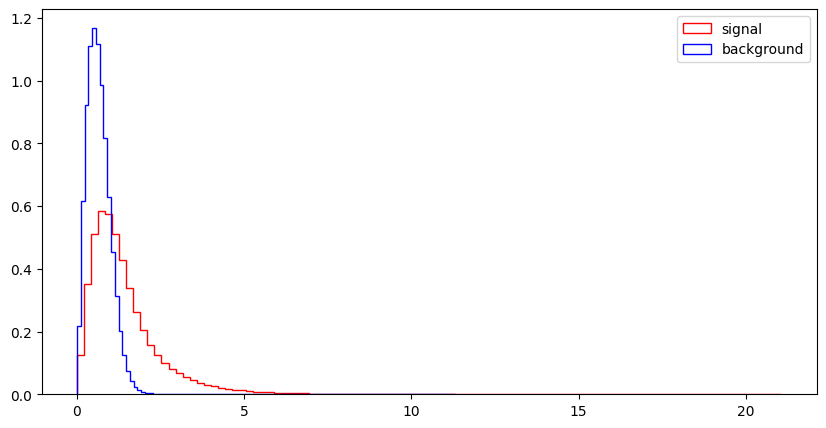

MET_phi


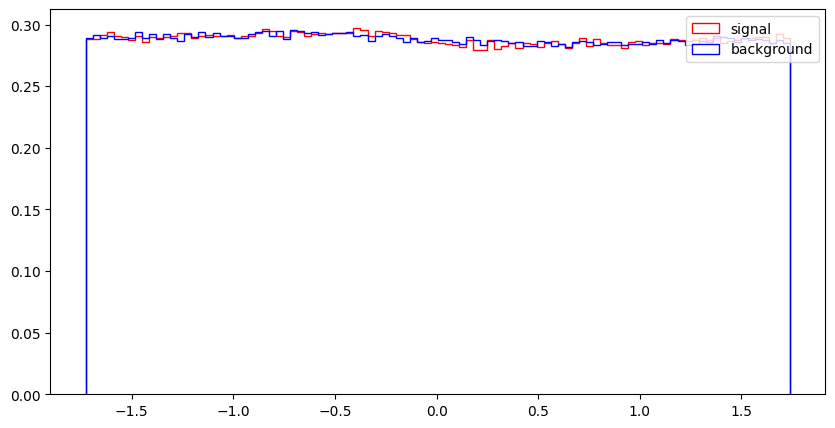

MET_rel


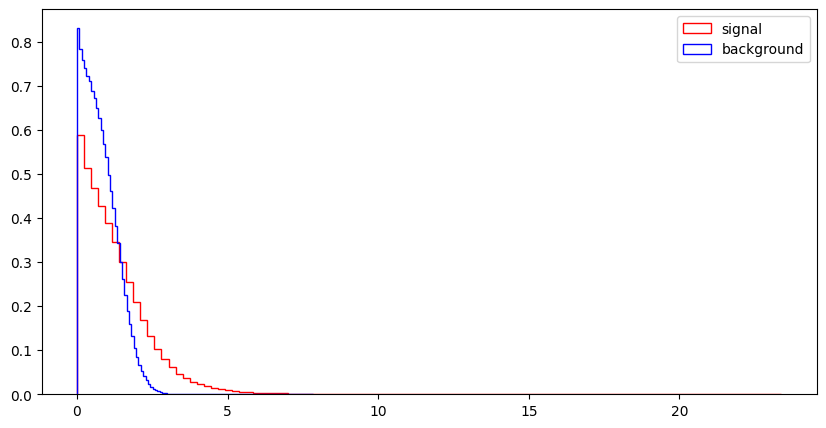

axial_MET


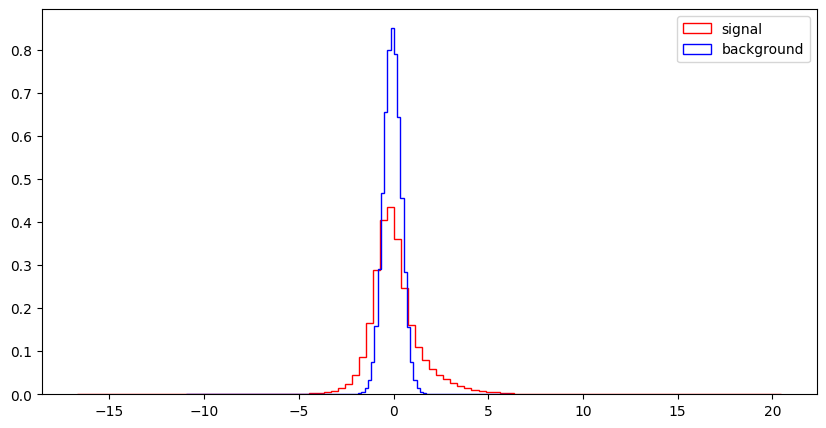

M_R


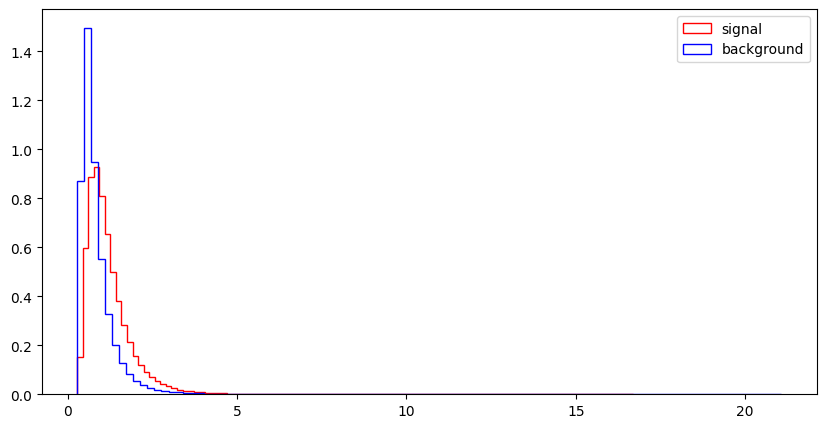

M_TR_2


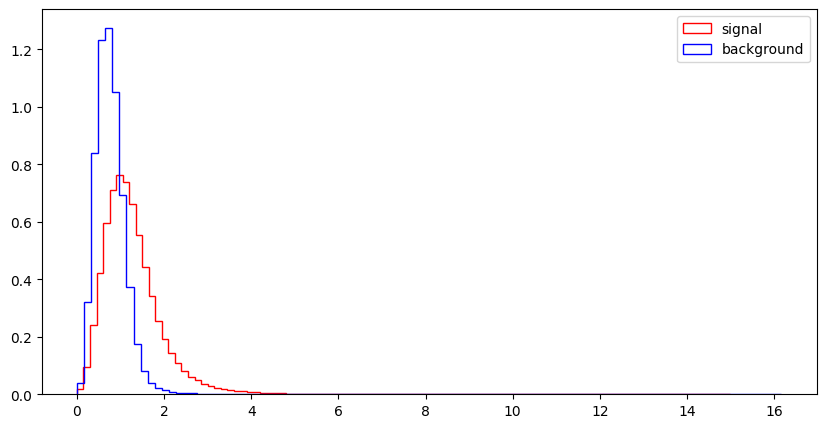

R


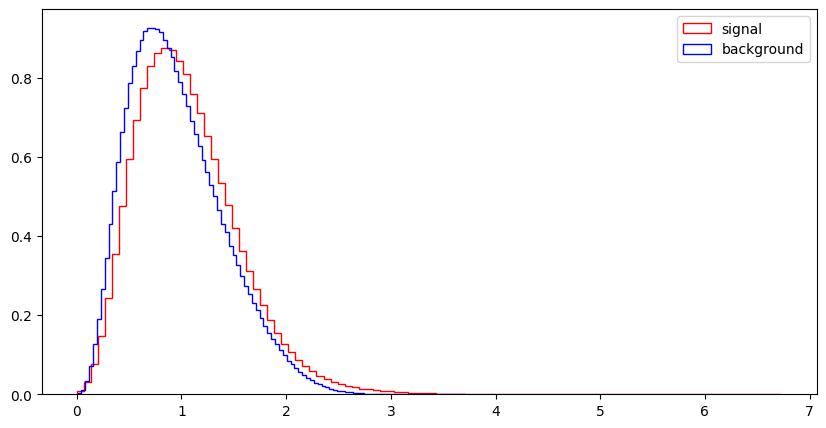

MT2


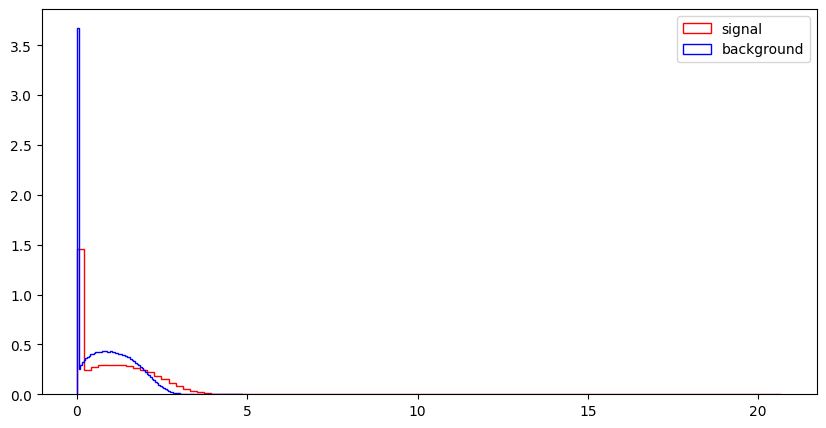

S_R


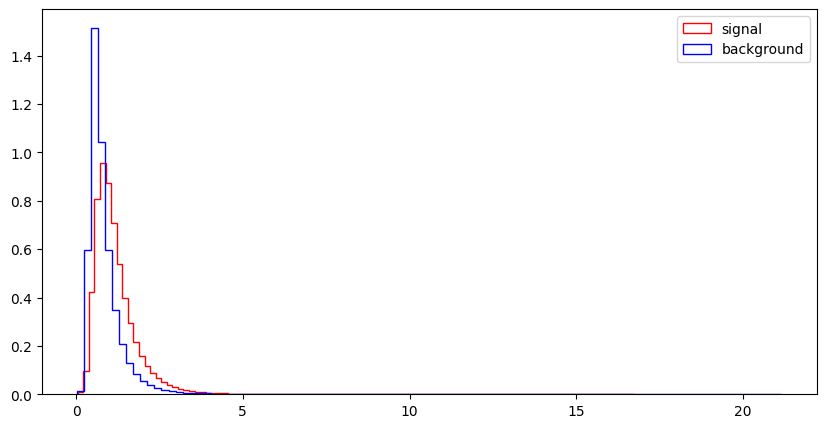

M_Delta_R


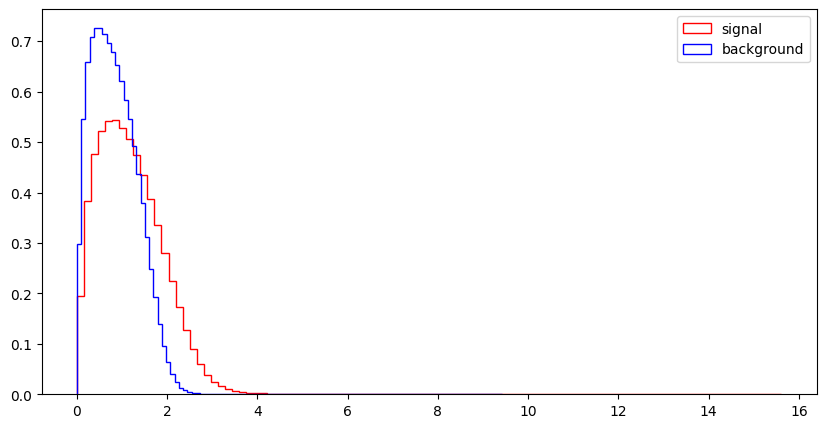

dPhi_r_b


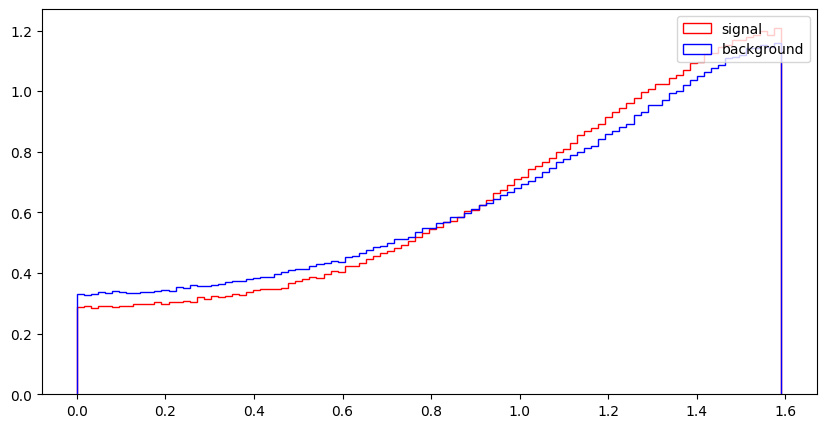

cos_theta_r1


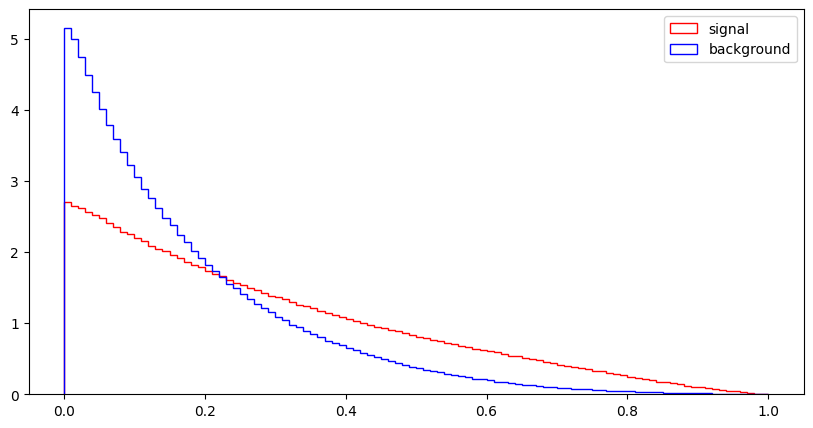

In [ ]:
import numpy as np
for var in VarNames[1:]:
    print (var)
    plt.figure(figsize=(10,5))
    plt.hist(np.array(df_sig[var]),bins=100,histtype="step", color="red",label="signal",density=1, stacked=True)
    plt.hist(np.array(df_bkg[var]),bins=100,histtype="step", color="blue", label="background",density=1, stacked=True)
    plt.legend(loc='upper right')
    plt.show()

## Exercise 3: Make nice figures

Now use `matplotlib` to reproduce as closely as you can figures 5 and 6 from the paper. This exercise is intended to get you to familiarize yourself with making nicely formatted `matplotlib` figures with multiple plots. Note that the plots in the paper are actually wrong!

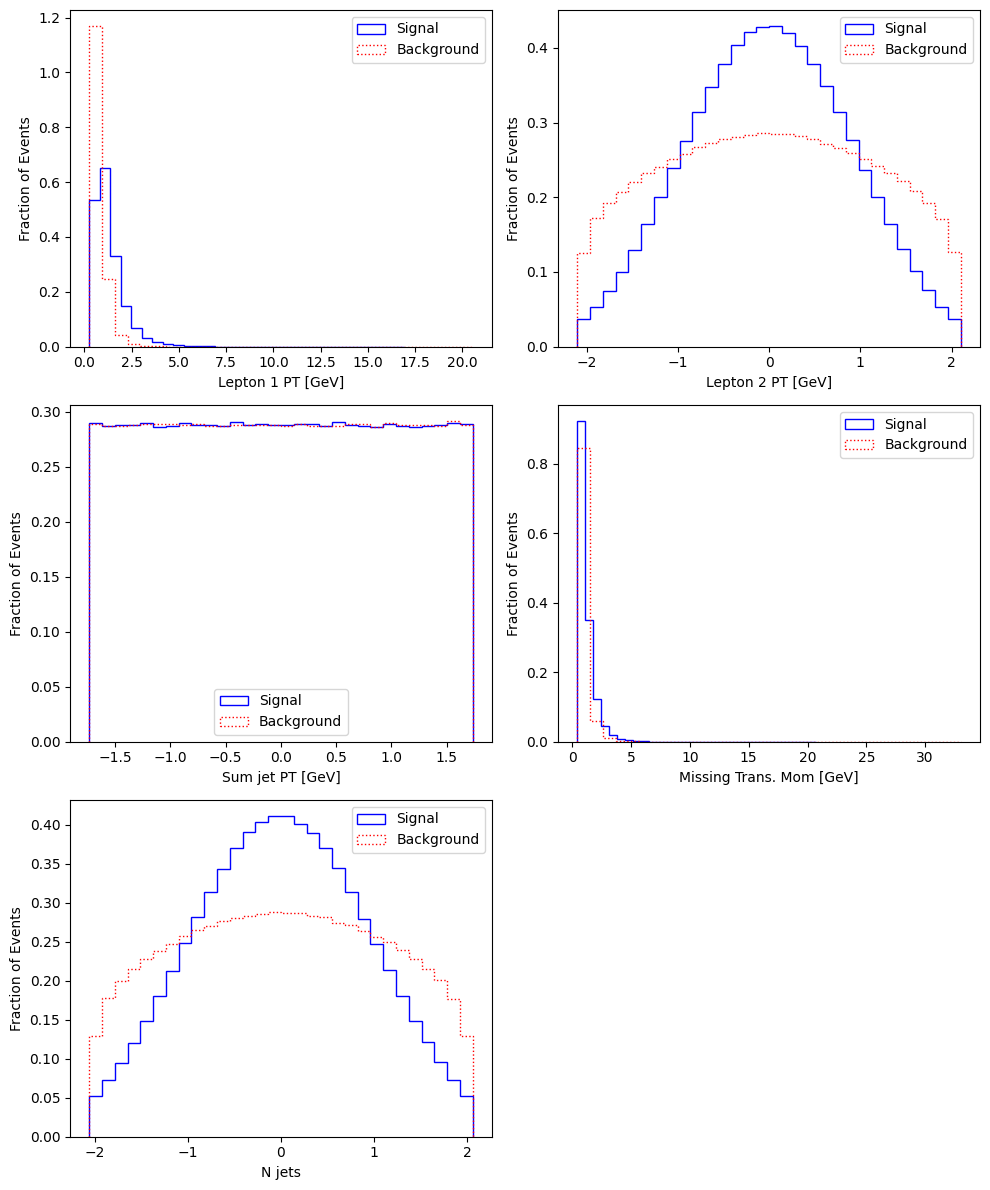

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Function to plot histograms for signal and background
def plot_feature(ax, signal_data, background_data, title, column):
    # Access the column using iloc to avoid KeyError
    ax.hist(signal_data.iloc[:, column], bins=30, density=True, histtype='step', color='blue', label='Signal')
    ax.hist(background_data.iloc[:, column], bins=30, density=True, histtype='step', color='red', linestyle='dotted', label='Background')
    ax.set_xlabel(title)
    ax.set_ylabel('Fraction of Events')
    ax.legend()

# Separate signal and background using iloc to access column by index
signal = df[df.iloc[:, 0] == 1]  # Access the first column (index 0) using iloc
background = df[df.iloc[:, 0] == 0]  # Access the first column (index 0) using iloc


# Define feature titles and respective columns
features = [
    ("Lepton 1 PT [GeV]", 1),
    ("Lepton 2 PT [GeV]", 2),
    ("Sum jet PT [GeV]", 3),
    ("Missing Trans. Mom [GeV]", 4),
    ("N jets", 5)
]

# Set up the figure with subplots
fig, axs = plt.subplots(3, 2, figsize=(10, 12))
axs = axs.ravel()

# Plot each feature using the function
for i, (title, col) in enumerate(features):
    plot_feature(axs[i], signal, background, title, col)

# Hide the last empty subplot
axs[-1].axis('off')

# Adjust layout for readability
plt.tight_layout()
plt.show()


## Exercise 4: Correlation

### Exercise 4.1

#### Part a
Write a function that creates pair plots and use it to compare variables in the SUSY sample, separately for low and high-level features. Refer to Lecture 13 for details. Do not use `seaborn`.

#### Part b
Making these plots can be slow because creating each plot initiates a full loop over the data. Make at least one modification to your function in part a to speed it up. Can you propose a different method of creating histograms that would speed up making such pair plots?

#### Part c
Which observables appear to be best for separating signal from background?

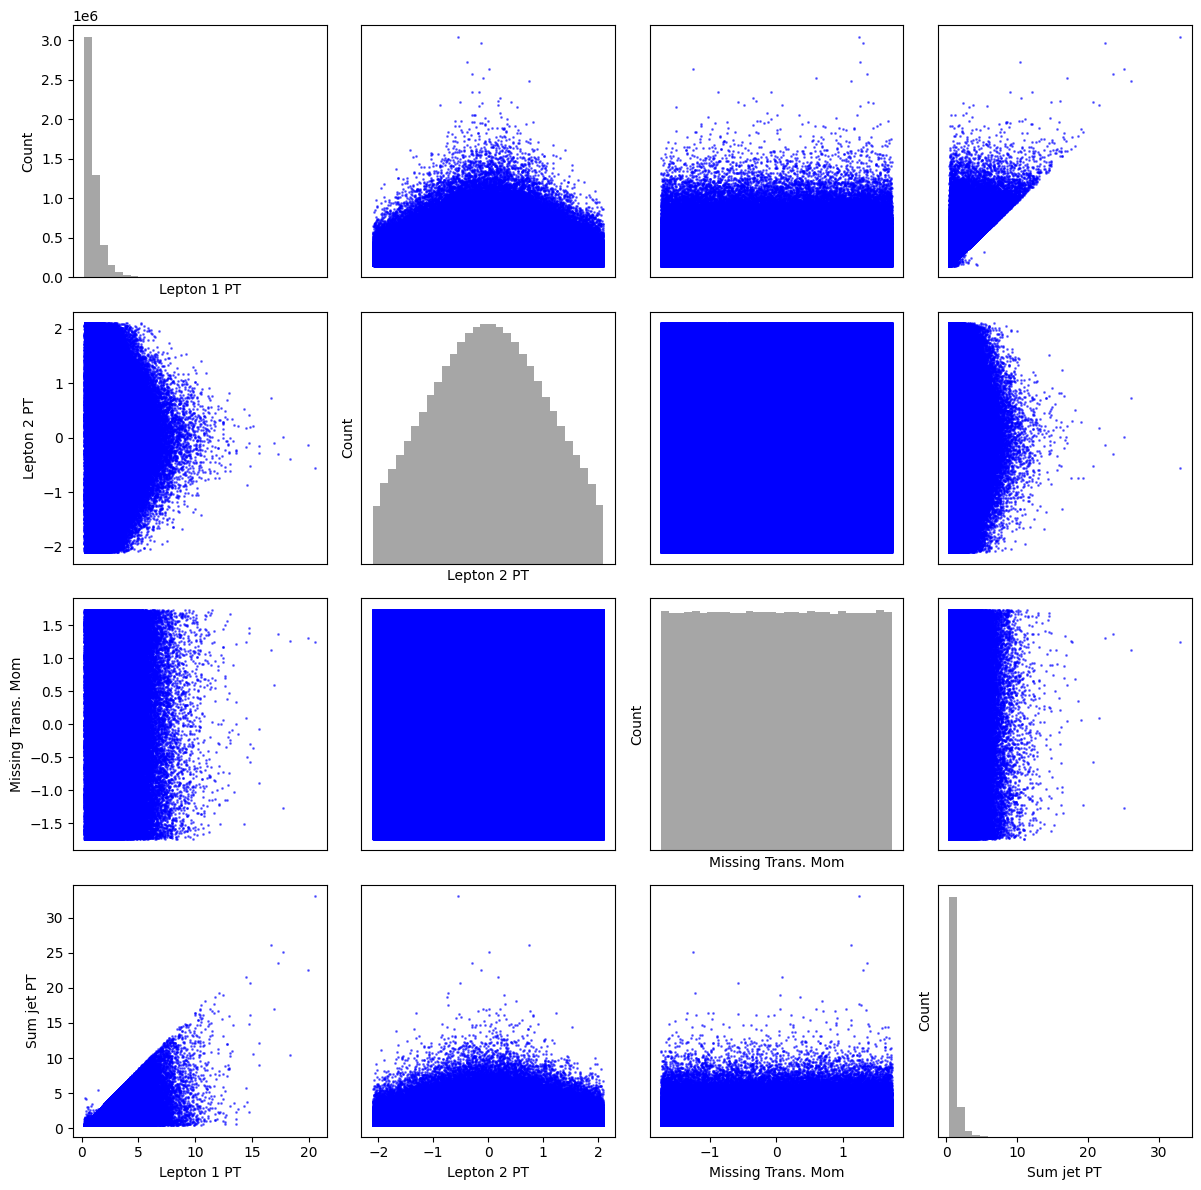

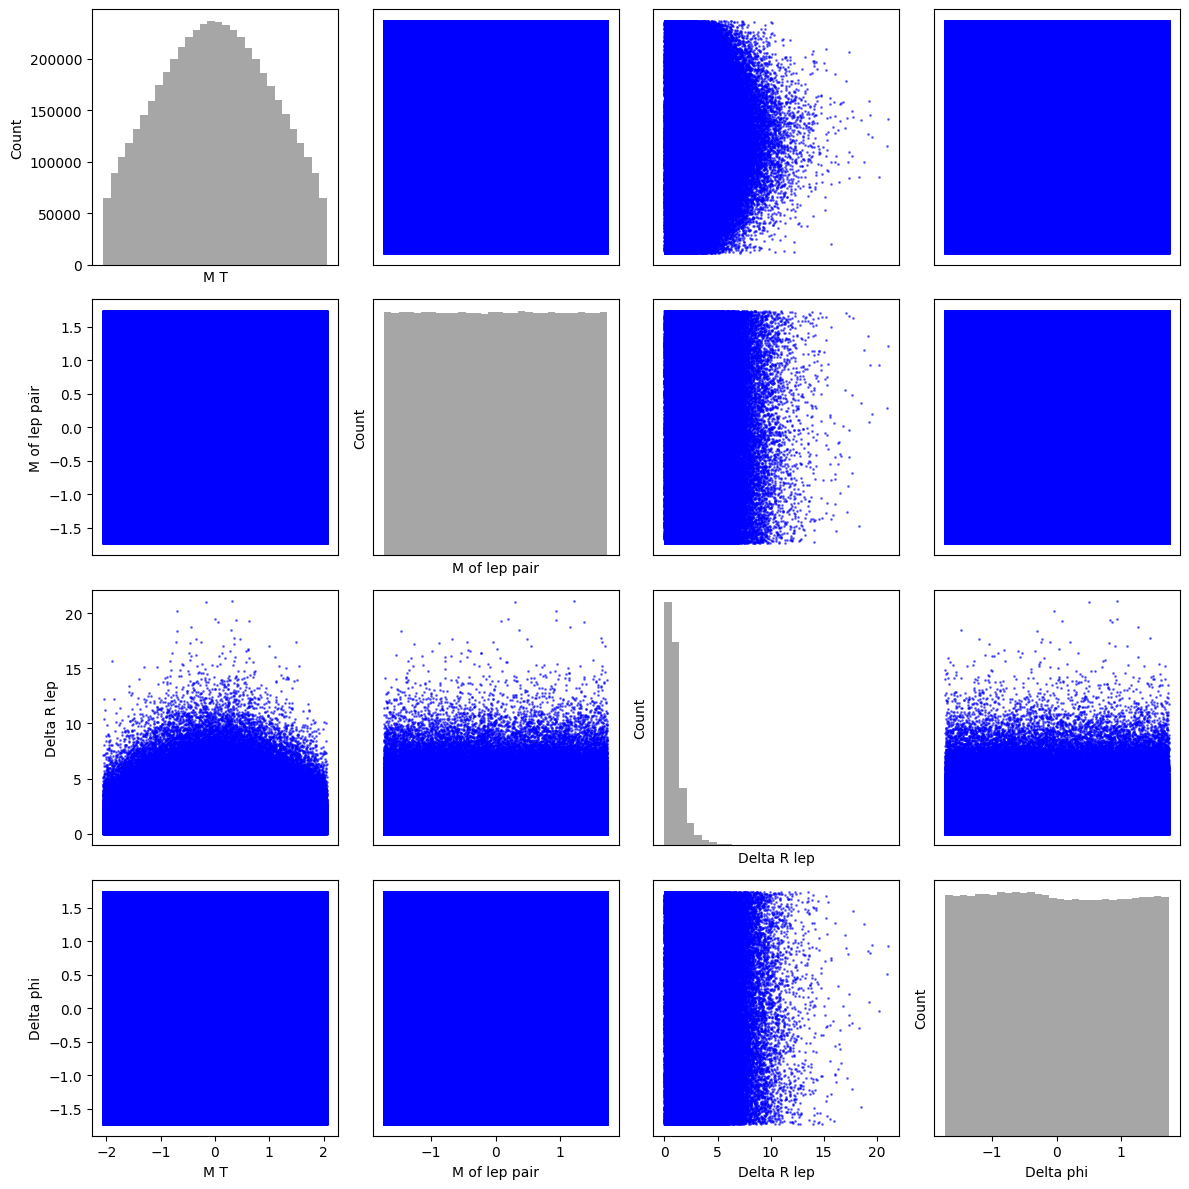

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def pair_plot(data, feature_columns, labels, fig_size=(12, 12)):
    """
    Creates pair plots for the given feature columns in the data.

    Parameters:
        data (DataFrame): The dataset containing the features to plot.
        feature_columns (list of str): List of column indices corresponding to features to plot.
        labels (list of str): List of names for the features, in the same order as feature_columns.
        fig_size (tuple): Size of the figure, default is (12, 12).
    """
    num_features = len(feature_columns)
    fig, axs = plt.subplots(num_features, num_features, figsize=fig_size)

    # Get actual column names from the DataFrame
    column_names = data.columns  # Assuming your columns have names

    for i in range(num_features):
        for j in range(num_features):
            ax = axs[i, j]

            if i == j:
                # Plot histogram on the diagonal
                # Access column by name using iloc
                ax.hist(data.iloc[:, feature_columns[i]], bins=30, color='gray', alpha=0.7)
                ax.set_xlabel(labels[i])
                ax.set_ylabel("Count")
            else:
                # Scatter plot for off-diagonal elements
                # Access columns by name using iloc
                ax.scatter(data.iloc[:, feature_columns[j]], data.iloc[:, feature_columns[i]], s=1, alpha=0.5, color='blue')

            # Set labels only on the edge plots for clarity
            if j == 0 and i != j:
                ax.set_ylabel(labels[i])
            if i == num_features - 1 and i != j:
                ax.set_xlabel(labels[j])

            # Remove internal axis labels for readability
            if i != num_features - 1:
                ax.set_xticks([])
            if j != 0:
                ax.set_yticks([])

    plt.tight_layout()
    plt.show()

low_level_features = [1, 2, 3, 4]  # Replace with actual column indices for low-level features
low_level_labels = ["Lepton 1 PT", "Lepton 2 PT", "Missing Trans. Mom", "Sum jet PT"]

high_level_features = [5, 6, 7, 8]  # Replace with actual column indices for high-level features
high_level_labels = ["M T", "M of lep pair", "Delta R lep", "Delta phi"]

# Create pair plots for low-level features
pair_plot(df, low_level_features, low_level_labels)

# Create pair plots for high-level features
pair_plot(df, high_level_features, high_level_labels)

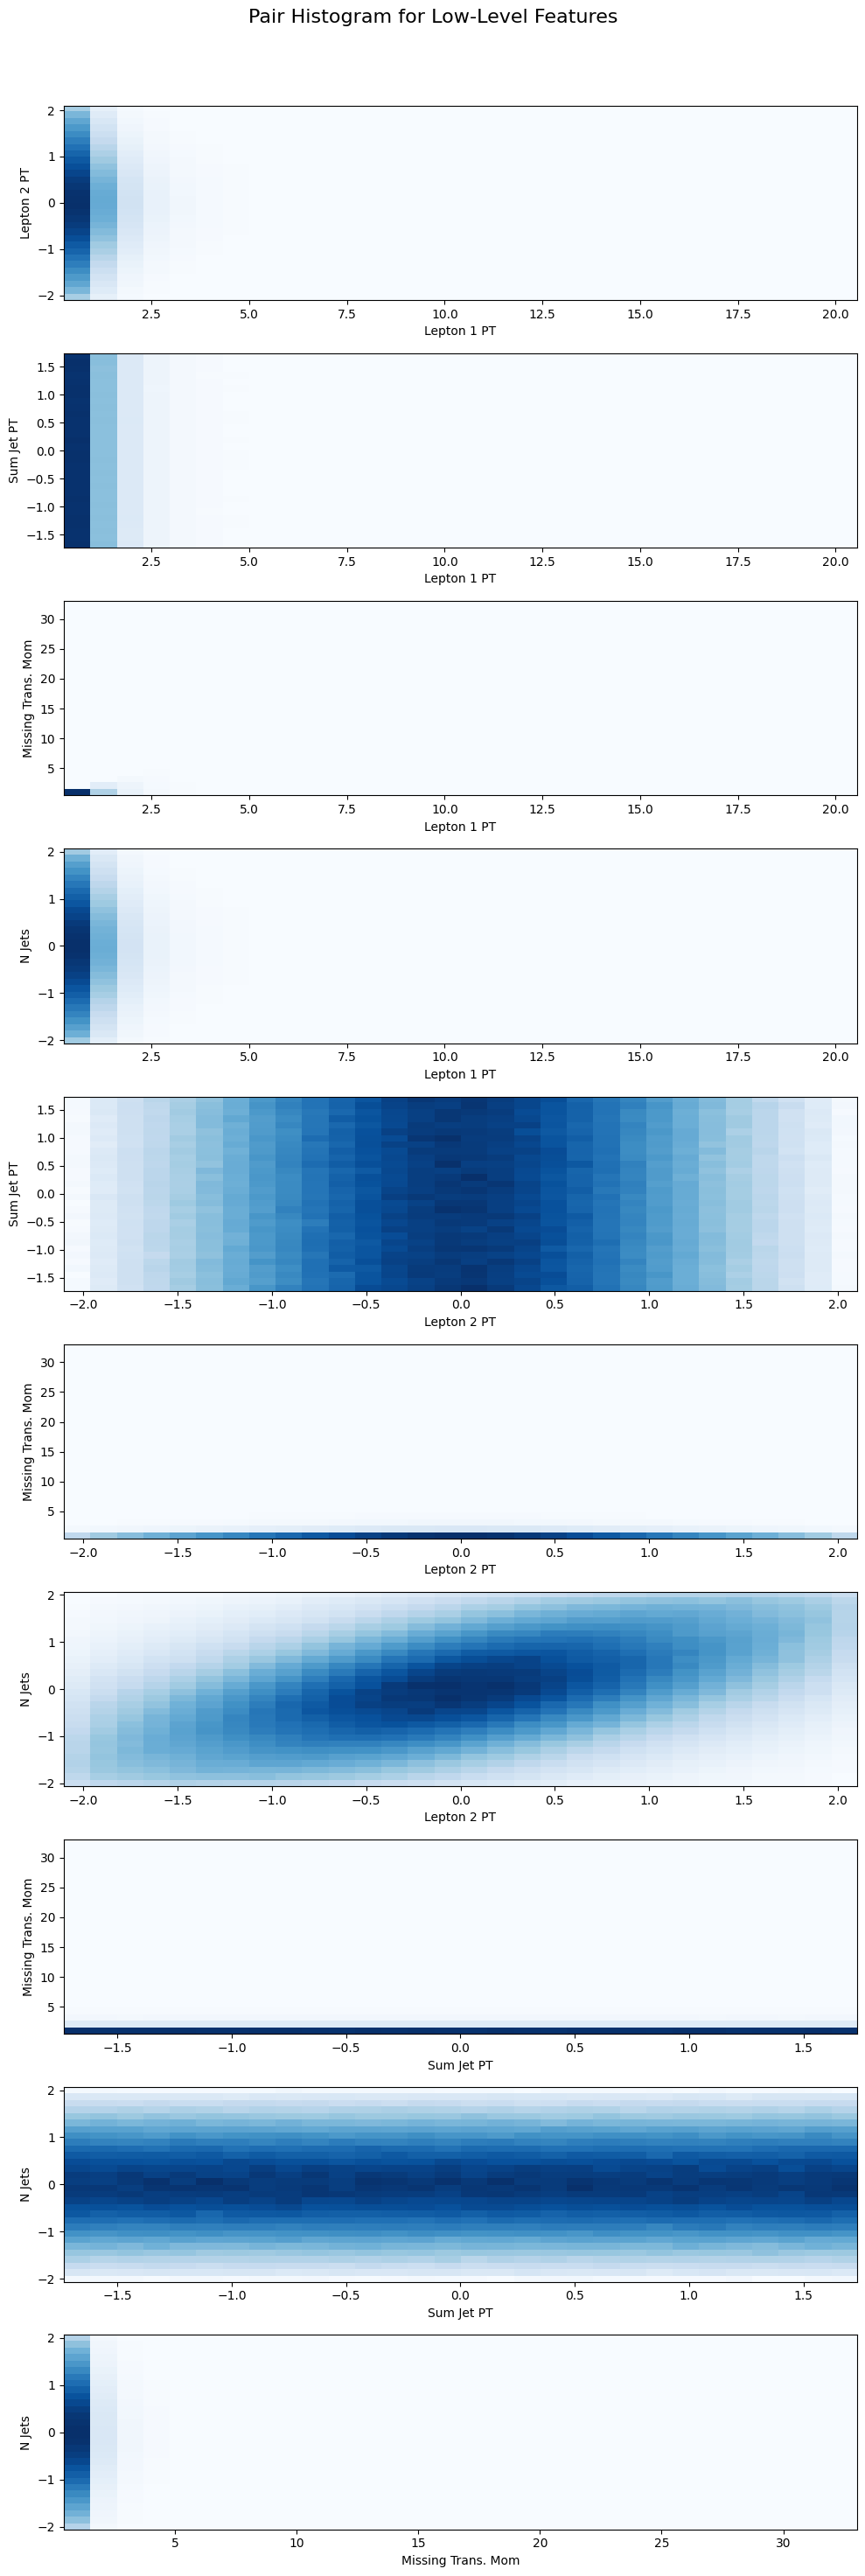

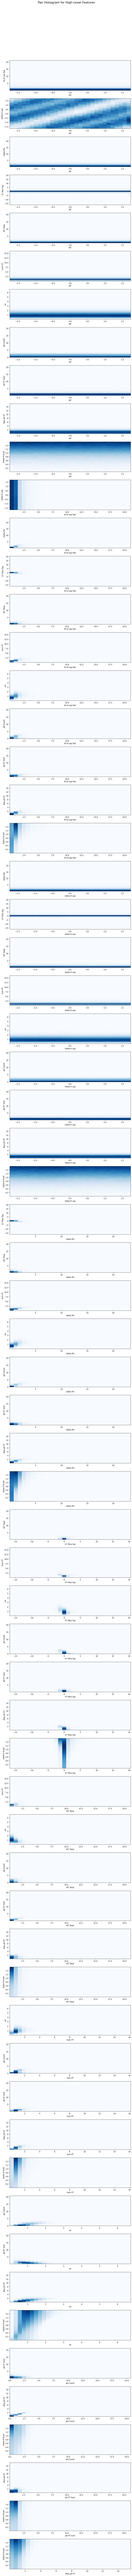

In [20]:
import itertools
import matplotlib.pyplot as plt
import numpy as np

# Separate low- and high-level features
low_level_features = df.iloc[:, 1:6]  # Columns 1 to 5 for low-level features
high_level_features = df.iloc[:, 6:18]  # Columns 6 to 17 for high-level features

def create_pair_histogram(features, feature_labels, title, bins=30):
    """
    Creates 2D histograms for each pair of features.

    Parameters:
        features (DataFrame): DataFrame with features for plotting.
        feature_labels (list of str): Labels for each feature.
        title (str): Title for the entire plot.
        bins (int): Number of bins for histograms, default is 30.
    """
    num_features = features.shape[1]
    feature_combinations = list(itertools.combinations(range(num_features), 2))
    num_plots = len(feature_combinations)

    # Define figure and axes for subplots
    fig, axs = plt.subplots(num_plots, 1, figsize=(10, num_plots * 3), squeeze=False)
    fig.suptitle(title, fontsize=16)

    for i, (x_idx, y_idx) in enumerate(feature_combinations):
        # Create a 2D histogram for each pair of features
        hist, x_edges, y_edges = np.histogram2d(
            features.iloc[:, x_idx],
            features.iloc[:, y_idx],
            bins=bins
        )

        # Plotting the histogram
        axs[i, 0].imshow(
            hist.T, origin='lower', aspect='auto',
            extent=[x_edges[0], x_edges[-1], y_edges[0], y_edges[-1]], cmap='Blues'
        )
        axs[i, 0].set_xlabel(feature_labels[x_idx])
        axs[i, 0].set_ylabel(feature_labels[y_idx])

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# Labels for low- and high-level features
low_level_labels = ["Lepton 1 PT", "Lepton 2 PT", "Sum Jet PT", "Missing Trans. Mom", "N Jets"]
high_level_labels = ["MT", "M of Lep Pair", "Delta R Lep", "Delta Phi", "ET Miss Sig", "MT Total", "Sum PT", "HT", "Jet Count", "Jet PT Sum", "Max Jet PT", "Delta R B-Jet"]

# Create pair histograms for low- and high-level features
create_pair_histogram(low_level_features, low_level_labels, "Pair Histogram for Low-Level Features")
create_pair_histogram(high_level_features, high_level_labels, "Pair Histogram for High-Level Features")


### Exercise 4.2

#### Part a
Install [tabulate](https://github.com/astanin/python-tabulate).

#### Part b
Use numpy to compute the [covariance matrix](https://numpy.org/doc/stable/reference/generated/numpy.cov.html) and [correlation matrix](https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html) between all observabes, and separately between low and high-level features.

#### Part c
Use tabulate to create a well formatted table of the covariance and correlation matrices, with nice headings and appropriate significant figures. Embed the table into this notebook.

#### Part d
Write a function that takes a dataset and appropriate arguments and performs steps b and c.  

In [21]:
!pip install tabulate


In [22]:
import numpy as np

# Extract the feature data from the DataFrame
all_features = df.iloc[:, 1:18]  # Columns 1 to 17, assuming column 0 is the target or an identifier
low_level_features = df.iloc[:, 1:6]  # Columns 1 to 5 for low-level features
high_level_features = df.iloc[:, 6:18]  # Columns 6 to 17 for high-level features

# Compute the covariance matrix for all features
cov_matrix_all = np.cov(all_features, rowvar=False)
corr_matrix_all = np.corrcoef(all_features, rowvar=False)

# Compute the covariance and correlation matrices for low-level features
cov_matrix_low = np.cov(low_level_features, rowvar=False)
corr_matrix_low = np.corrcoef(low_level_features, rowvar=False)

# Compute the covariance and correlation matrices for high-level features
cov_matrix_high = np.cov(high_level_features, rowvar=False)
corr_matrix_high = np.corrcoef(high_level_features, rowvar=False)

# Display the results
print("Covariance Matrix - All Features:\n", cov_matrix_all)
print("\nCorrelation Matrix - All Features:\n", corr_matrix_all)

print("\nCovariance Matrix - Low-Level Features:\n", cov_matrix_low)
print("\nCorrelation Matrix - Low-Level Features:\n", corr_matrix_low)

print("\nCovariance Matrix - High-Level Features:\n", cov_matrix_high)
print("\nCorrelation Matrix - High-Level Features:\n", corr_matrix_high)


Covariance Matrix - All Features:
 [[ 4.72428126e-01 -2.62666897e-04 -2.29060618e-04  3.07887443e-01
  -3.02456872e-04  2.27164310e-04  2.30950772e-01 -6.76375484e-04
   9.85665087e-02 -1.25117429e-02  3.68084648e-01  2.90830895e-01
  -5.92849382e-02 -1.27781651e-02  3.46283105e-01  9.80831420e-02
  -4.70231189e-02]
 [-2.62666897e-04  1.00622400e+00  3.21599952e-04 -3.77895911e-04
   4.05877394e-01  2.97083862e-04 -5.57684419e-04 -5.40623754e-04
  -4.96645666e-04 -4.97511845e-04 -3.08116876e-04 -2.65899836e-04
   1.27738268e-04 -1.57618075e-04 -2.81414480e-04 -5.04145408e-04
   7.96492827e-05]
 [-2.29060618e-04  3.21599952e-04  1.00334220e+00 -1.28546630e-04
   6.41115931e-04 -2.68130132e-01  1.20012378e-03 -1.84183886e-01
   1.52891120e-03 -1.96469455e-03 -1.99692758e-04  8.37778126e-04
   8.76412682e-04  1.75405466e-03  4.49583619e-05  1.31238252e-03
   9.53611330e-04]
 [ 3.07887443e-01 -3.77895911e-04 -1.28546630e-04  4.28003791e-01
  -4.54288205e-04  1.14725700e-04  7.97039608e-02 

In [25]:
import numpy as np
from tabulate import tabulate
import pandas as pd

# Separate feature data from DataFrame
all_features = df.iloc[:, 1:18]  # Columns 1 to 17
low_level_features = df.iloc[:, 1:6]  # Columns 1 to 5
high_level_features = df.iloc[:, 6:18]  # Columns 6 to 17

# Compute covariance and correlation matrices
cov_matrix_all = np.cov(all_features, rowvar=False)
corr_matrix_all = np.corrcoef(all_features, rowvar=False)
cov_matrix_low = np.cov(low_level_features, rowvar=False)
corr_matrix_low = np.corrcoef(low_level_features, rowvar=False)
cov_matrix_high = np.cov(high_level_features, rowvar=False)
corr_matrix_high = np.corrcoef(high_level_features, rowvar=False)

# Define feature labels
all_feature_labels = all_features.columns.tolist()  # Assuming `df` has column names for all features
low_level_labels = ["Lepton 1 PT", "Lepton 2 PT", "Sum Jet PT", "Missing Trans. Mom", "N Jets"]
high_level_labels = ["MT", "M of Lep Pair", "Delta R Lep", "Delta Phi", "ET Miss Sig",
                     "MT Total", "Sum PT", "HT", "Jet Count", "Jet PT Sum", "Max Jet PT", "Delta R B-Jet"]

# Format matrices with 3 significant figures
def format_matrix(matrix, labels):
    df = pd.DataFrame(matrix, index=labels, columns=labels)
    return tabulate(df.round(3), headers="keys", tablefmt="grid")

# Display tables with tabulate
print("Covariance Matrix - All Features")
print(format_matrix(cov_matrix_all, all_feature_labels))

print("\nCorrelation Matrix - All Features")
print(format_matrix(corr_matrix_all, all_feature_labels))

print("\nCovariance Matrix - Low-Level Features")
print(format_matrix(cov_matrix_low, low_level_labels))

print("\nCorrelation Matrix - Low-Level Features")
print(format_matrix(corr_matrix_low, low_level_labels))

print("\nCovariance Matrix - High-Level Features")
print(format_matrix(cov_matrix_high, high_level_labels))

print("\nCorrelation Matrix - High-Level Features")
print(format_matrix(corr_matrix_high, high_level_labels))


Covariance Matrix - All Features
+-----------+----------+-----------+-----------+----------+-----------+-----------+--------+-----------+-----------+-------------+--------+----------+--------+--------+--------+-------------+------------+
|           |   l_1_pT |   l_1_eta |   l_1_phi |   l_2_pT |   l_2_eta |   l_2_phi |    MET |   MET_phi |   MET_rel |   axial_MET |    M_R |   M_TR_2 |      R |    MT2 |    S_R |   M_Delta_R |   dPhi_r_b |
+===========+==========+===========+===========+==========+===========+===========+========+===========+===========+=============+========+==========+========+========+========+=============+============+
| l_1_pT    |    0.472 |    -0     |    -0     |    0.308 |    -0     |     0     |  0.231 |    -0.001 |     0.099 |      -0.013 |  0.368 |    0.291 | -0.059 | -0.013 |  0.346 |       0.098 |     -0.047 |
+-----------+----------+-----------+-----------+----------+-----------+-----------+--------+-----------+-----------+-------------+--------+--------

In [26]:
import numpy as np
from tabulate import tabulate
import pandas as pd

def compute_and_display_matrices(df, low_level_cols, high_level_cols):
    """
    Computes and displays the covariance and correlation matrices for all features,
    low-level features, and high-level features.

    Parameters:
        df (DataFrame): The input DataFrame containing the features.
        low_level_cols (list of int): Column indices for low-level features.
        high_level_cols (list of int): Column indices for high-level features.
    """
    # Extract feature data from the DataFrame
    all_features = df.iloc[:, 1:18]  # Assuming columns 1 to 17 contain features
    low_level_features = df.iloc[:, low_level_cols]
    high_level_features = df.iloc[:, high_level_cols]

    # Compute covariance and correlation matrices
    cov_matrix_all = np.cov(all_features, rowvar=False)
    corr_matrix_all = np.corrcoef(all_features, rowvar=False)
    cov_matrix_low = np.cov(low_level_features, rowvar=False)
    corr_matrix_low = np.corrcoef(low_level_features, rowvar=False)
    cov_matrix_high = np.cov(high_level_features, rowvar=False)
    corr_matrix_high = np.corrcoef(high_level_features, rowvar=False)

    # Define feature labels
    all_feature_labels = all_features.columns.tolist()
    low_level_labels = ["Lepton 1 PT", "Lepton 2 PT", "Sum Jet PT", "Missing Trans. Mom", "N Jets"]
    high_level_labels = ["MT", "M of Lep Pair", "Delta R Lep", "Delta Phi", "ET Miss Sig",
                         "MT Total", "Sum PT", "HT", "Jet Count", "Jet PT Sum", "Max Jet PT", "Delta R B-Jet"]

    # Format matrices with 3 significant figures
    def format_matrix(matrix, labels):
        df_matrix = pd.DataFrame(matrix, index=labels, columns=labels)
        return tabulate(df_matrix.round(3), headers="keys", tablefmt="grid")

    # Display covariance and correlation matrices
    print("Covariance Matrix - All Features")
    print(format_matrix(cov_matrix_all, all_feature_labels))

    print("\nCorrelation Matrix - All Features")
    print(format_matrix(corr_matrix_all, all_feature_labels))

    print("\nCovariance Matrix - Low-Level Features")
    print(format_matrix(cov_matrix_low, low_level_labels))

    print("\nCorrelation Matrix - Low-Level Features")
    print(format_matrix(corr_matrix_low, low_level_labels))

    print("\nCovariance Matrix - High-Level Features")
    print(format_matrix(cov_matrix_high, high_level_labels))

    print("\nCorrelation Matrix - High-Level Features")
    print(format_matrix(corr_matrix_high, high_level_labels))

# Example usage of the function:
# Assuming `df` is your DataFrame with relevant data
low_level_indices = [1, 2, 3, 4, 5]  # Column indices for low-level features
high_level_indices = [6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]  # Column indices for high-level features

# Call the function
compute_and_display_matrices(df, low_level_indices, high_level_indices)


Covariance Matrix - All Features
+-----------+----------+-----------+-----------+----------+-----------+-----------+--------+-----------+-----------+-------------+--------+----------+--------+--------+--------+-------------+------------+
|           |   l_1_pT |   l_1_eta |   l_1_phi |   l_2_pT |   l_2_eta |   l_2_phi |    MET |   MET_phi |   MET_rel |   axial_MET |    M_R |   M_TR_2 |      R |    MT2 |    S_R |   M_Delta_R |   dPhi_r_b |
+===========+==========+===========+===========+==========+===========+===========+========+===========+===========+=============+========+==========+========+========+========+=============+============+
| l_1_pT    |    0.472 |    -0     |    -0     |    0.308 |    -0     |     0     |  0.231 |    -0.001 |     0.099 |      -0.013 |  0.368 |    0.291 | -0.059 | -0.013 |  0.346 |       0.098 |     -0.047 |
+-----------+----------+-----------+-----------+----------+-----------+-----------+--------+-----------+-----------+-------------+--------+--------

Hint: Example code for embedding a `tabulate` table into a notebook:

In [ ]:
from IPython.display import HTML, display
import tabulate
table = [["A",1,2],
        ["C",3,4],
        ["D",5,6]]
display(HTML(tabulate.tabulate(table, tablefmt='html', headers=["X","Y","Z"])))

X,Y,Z
A,1,2
C,3,4
D,5,6


## Exercise 5: Selection

### Exercise 5.1

Part a
By looking at the signal/background distributions for each observable (e.g. $x$) determine which selection criteria would be optimal:

1. $x > x_c$
2. $x < x_c$
3. $|x - \mu| > x_c$
4. $|x - \mu| < x_c$

where $x_c$ is value to be determined below.

### Exercise 5.2

Plot the True Positive Rate (TPR) (aka signal efficiency $\epsilon_S(x_c)$) and False Positive Rate (FPR) (aka background efficiency $\epsilon_B(x_c)$) as function of $x_c$ for applying the strategy in part a to each observable.

### Exercise 5.3
Assume 3 different scenarios corresponding to different numbers of signal and background events expected in data:

1. Expect $N_S=10$, $N_B=100$.
1. Expect $N_S=100$, $N_B=1000$.
1. Expect $N_S=1000$, $N_B=10000$.
1. Expect $N_S=10000$, $N_B=100000$.

Plot the significance ($\sigma_{S'}$) for each observable as function of $x_c$ for each scenario, where

$\sigma_{S'}= \frac{N'_S}{\sqrt{N'_S+N'_B}}$

and $N'_{S,B} = \epsilon_{S,B}(x_c) * N_{S,B}$.

In [29]:
import numpy as np
import pandas as pd
from tabulate import tabulate
from IPython.display import HTML, display

# Load the dataset
df = pd.read_csv('SUSY-small.csv', header=None)

def compute_and_display_matrices(data, feature_indices=None, feature_type="All Features"):
    """
    Compute and display covariance and correlation matrices for specified features.

    Parameters:
    - data (DataFrame): The dataset containing the features.
    - feature_indices (list of int): Optional list of column indices to select specific features.
    - feature_type (str): A label for the feature type (e.g., "Low-Level Features").
    """
    # Select the specified features if indices are provided
    features = data.iloc[:, feature_indices] if feature_indices else data

    # Compute the covariance and correlation matrices
    cov_matrix = np.cov(features, rowvar=False)
    corr_matrix = np.corrcoef(features, rowvar=False)

    # Generate headers based on selected features
    headers = [f"{feature_type} {i+1}" for i in range(features.shape[1])]

    # Helper function to format and display matrices with tabulate
    def display_matrix(matrix, title):
        formatted_matrix = [[f"{val:.3f}" for val in row] for row in matrix]
        table = tabulate(formatted_matrix, headers=headers, tablefmt="html")
        display(HTML(f"<h3>{title}</h3>{table}"))

    # Display the matrices
    display_matrix(cov_matrix, f"Covariance Matrix ({feature_type})")
    display_matrix(corr_matrix, f"Correlation Matrix ({feature_type})")

# Example usage
# Define indices for low- and high-level features
low_level_indices = list(range(1, 6))  # Adjust these indices based on your dataset
high_level_indices = list(range(6, 18))  # Adjust these indices based on your dataset

# Compute and display matrices for low-level features
compute_and_display_matrices(df, feature_indices=low_level_indices, feature_type="Low-Level Features")

# Compute and display matrices for high-level features
compute_and_display_matrices(df, feature_indices=high_level_indices, feature_type="High-Level Features")

# Compute and display matrices for all features
compute_and_display_matrices(df, feature_type="All Features")





Low-Level Features 1,Low-Level Features 2,Low-Level Features 3,Low-Level Features 4,Low-Level Features 5
0.467,-0,0,0.305,-0
-0,1.004,-0.001,-0,0.408
0,-0.001,1.004,0.001,0
0.305,-0,0.001,0.425,-0.001
-0,0.408,0,-0.001,1.006


Low-Level Features 1,Low-Level Features 2,Low-Level Features 3,Low-Level Features 4,Low-Level Features 5
1,-0.001,0,0.684,-0.001
-0.001,1,-0.001,-0,0.406
0,-0.001,1,0.002,0
0.684,-0,0.002,1,-0.001
-0.001,0.406,0,-0.001,1


High-Level Features 1,High-Level Features 2,High-Level Features 3,High-Level Features 4,High-Level Features 5,High-Level Features 6,High-Level Features 7,High-Level Features 8,High-Level Features 9,High-Level Features 10,High-Level Features 11,High-Level Features 12
1.004,-0,-0.035,0.001,-0.002,0.001,0.001,0.001,0.002,0.001,0.001,-0
-0,0.762,-0.003,0.546,0.154,0.145,0.365,0.188,0.155,0.166,0.315,0.146
-0.035,-0.003,1.003,-0.005,-0,-0.001,-0.001,-0,0,-0.002,-0.001,-0.002
0.001,0.546,-0.005,0.79,-0.12,0.044,0.302,0.249,0.409,0.082,0.415,0.146
-0.002,0.154,-0,-0.12,1.005,0.017,-0.185,-0.181,-0.461,-0.041,-0.233,-0.025
0.001,0.145,-0.001,0.044,0.017,0.392,0.21,-0.113,-0.037,0.38,0.074,-0.029
0.001,0.365,-0.001,0.302,-0.185,0.21,0.338,0.104,0.189,0.228,0.242,0.058
0.001,0.188,-0,0.249,-0.181,-0.113,0.104,0.222,0.232,-0.083,0.165,0.087
0.002,0.155,0,0.409,-0.461,-0.037,0.189,0.232,0.738,-0.011,0.433,0.021
0.001,0.166,-0.002,0.082,-0.041,0.38,0.228,-0.083,-0.011,0.382,0.096,-0.003


High-Level Features 1,High-Level Features 2,High-Level Features 3,High-Level Features 4,High-Level Features 5,High-Level Features 6,High-Level Features 7,High-Level Features 8,High-Level Features 9,High-Level Features 10,High-Level Features 11,High-Level Features 12
1,-0,-0.035,0.002,-0.002,0.001,0.001,0.001,0.003,0.001,0.002,-0.001
-0,1,-0.003,0.704,0.176,0.264,0.72,0.457,0.206,0.307,0.579,0.383
-0.035,-0.003,1,-0.005,-0,-0.002,-0.002,-0,0,-0.003,-0.001,-0.004
0.002,0.704,-0.005,1,-0.134,0.078,0.584,0.595,0.535,0.15,0.748,0.378
-0.002,0.176,-0,-0.134,1,0.027,-0.317,-0.383,-0.535,-0.067,-0.373,-0.057
0.001,0.264,-0.002,0.078,0.027,1,0.577,-0.383,-0.068,0.981,0.189,-0.106
0.001,0.72,-0.002,0.584,-0.317,0.577,1,0.38,0.379,0.635,0.668,0.229
0.001,0.457,-0,0.595,-0.383,-0.383,0.38,1,0.574,-0.287,0.564,0.424
0.003,0.206,0,0.535,-0.535,-0.068,0.379,0.574,1,-0.021,0.809,0.056
0.001,0.307,-0.003,0.15,-0.067,0.981,0.635,-0.287,-0.021,1,0.249,-0.013


All Features 1,All Features 2,All Features 3,All Features 4,All Features 5,All Features 6,All Features 7,All Features 8,All Features 9,All Features 10,All Features 11,All Features 12,All Features 13,All Features 14,All Features 15,All Features 16,All Features 17,All Features 18,All Features 19
0.248,0.133,0,0,0.064,0.001,0,0.191,-0,0.125,0.04,0.084,0.123,0.026,0.034,0.081,0.085,0.007,0.026
0.133,0.467,-0,0,0.305,-0,0.001,0.228,-0.001,0.098,-0.01,0.364,0.287,-0.06,-0.012,0.343,0.098,-0.047,0.022
0,-0,1.004,-0.001,-0,0.408,-0.001,-0.002,-0.001,-0.001,-0.001,-0.001,-0.001,0,0,-0.001,-0.001,-0.001,0
0,0,-0.001,1.004,0.001,0,-0.267,0.001,-0.185,0.001,-0.002,0.001,0.001,0,0.001,0.001,0.001,0.001,0
0.064,0.305,-0,0.001,0.425,-0.001,0,0.079,-0.002,-0.001,0.051,0.325,0.163,-0.099,-0.069,0.322,0.006,-0.004,-0.028
0.001,-0,0.408,0,-0.001,1.006,0,0,-0,0.001,-0.001,-0.001,0,0,0.001,-0.001,0.001,-0,0
0,0.001,-0.001,-0.267,0,0,1.004,-0,-0.035,0.001,-0.002,0.001,0.001,0.001,0.002,0.001,0.001,-0,0
0.191,0.228,-0.002,0.001,0.079,0,-0,0.762,-0.003,0.546,0.154,0.145,0.365,0.188,0.155,0.166,0.315,0.146,0.073
-0,-0.001,-0.001,-0.185,-0.002,-0,-0.035,-0.003,1.003,-0.005,-0,-0.001,-0.001,-0,0,-0.002,-0.001,-0.002,0
0.125,0.098,-0.001,0.001,-0.001,0.001,0.001,0.546,-0.005,0.79,-0.12,0.044,0.302,0.249,0.409,0.082,0.415,0.146,0.055


All Features 1,All Features 2,All Features 3,All Features 4,All Features 5,All Features 6,All Features 7,All Features 8,All Features 9,All Features 10,All Features 11,All Features 12,All Features 13,All Features 14,All Features 15,All Features 16,All Features 17,All Features 18,All Features 19
1,0.391,0,0,0.197,0.001,0,0.44,-0.001,0.283,0.079,0.27,0.426,0.109,0.08,0.262,0.274,0.033,0.267
0.391,1,-0.001,0,0.684,-0.001,0.001,0.383,-0.001,0.16,-0.014,0.851,0.723,-0.186,-0.021,0.811,0.229,-0.157,0.165
0,-0.001,1,-0.001,-0,0.406,-0.001,-0.002,-0.001,-0.002,-0.001,-0.001,-0.001,0.001,0,-0.001,-0.002,-0.002,0.002
0,0,-0.001,1,0.002,0,-0.266,0.001,-0.184,0.001,-0.002,0.002,0.001,0,0.001,0.002,0.001,0.002,0.001
0.197,0.684,-0,0.002,1,-0.001,0,0.14,-0.002,-0.001,0.078,0.797,0.43,-0.324,-0.123,0.799,0.014,-0.013,-0.217
0.001,-0.001,0.406,0,-0.001,1,0,0,-0,0.001,-0.001,-0.001,0,0.001,0.002,-0.001,0.001,-0.001,0.001
0,0.001,-0.001,-0.266,0,0,1,-0,-0.035,0.002,-0.002,0.001,0.001,0.001,0.003,0.001,0.002,-0.001,0
0.44,0.383,-0.002,0.001,0.14,0,-0,1,-0.003,0.704,0.176,0.264,0.72,0.457,0.206,0.307,0.579,0.383,0.425
-0.001,-0.001,-0.001,-0.184,-0.002,-0,-0.035,-0.003,1,-0.005,-0,-0.002,-0.002,-0,0,-0.003,-0.001,-0.004,0.001
0.283,0.16,-0.002,0.001,-0.001,0.001,0.002,0.704,-0.005,1,-0.134,0.078,0.584,0.595,0.535,0.15,0.748,0.378,0.316


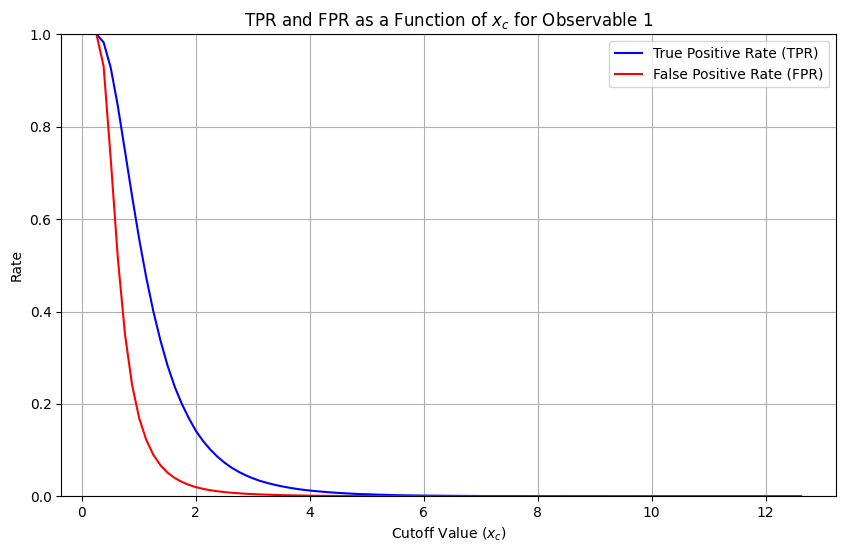

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('SUSY-small.csv', header=None)

# Separate signal and background data
signal = df[df[0] == 1]  # Assuming first column marks signal (1)
background = df[df[0] == 0]  # Assuming first column marks background (0)

def calculate_tpr_fpr(signal, background, column, xc_values):
    """
    Calculate TPR and FPR for a given observable and range of xc values.

    Parameters:
    - signal (DataFrame): Signal dataset.
    - background (DataFrame): Background dataset.
    - column (str): Column name of the observable.
    - xc_values (array-like): Range of xc values to evaluate.

    Returns:
    - tpr (list): True Positive Rate for each xc.
    - fpr (list): False Positive Rate for each xc.
    """
    tpr = []
    fpr = []

    # Total signal and background events
    total_signal = len(signal)
    total_background = len(background)

    for xc in xc_values:
        # Calculate TPR
        S_pass = (signal[column] > xc).sum()
        TPR = S_pass / total_signal if total_signal > 0 else 0
        tpr.append(TPR)

        # Calculate FPR
        B_pass = (background[column] > xc).sum()
        FPR = B_pass / total_background if total_background > 0 else 0
        fpr.append(FPR)

    return tpr, fpr

# Define the observable and range of xc values
column = 1  # Change this to the appropriate column index for your observable
xc_values = np.linspace(signal[column].min(), signal[column].max(), 100)

# Calculate TPR and FPR
tpr, fpr = calculate_tpr_fpr(signal, background, column, xc_values)

# Plotting TPR and FPR
plt.figure(figsize=(10, 6))
plt.plot(xc_values, tpr, label='True Positive Rate (TPR)', color='blue')
plt.plot(xc_values, fpr, label='False Positive Rate (FPR)', color='red')
plt.xlabel('Cutoff Value ($x_c$)')
plt.ylabel('Rate')
plt.title(f'TPR and FPR as a Function of $x_c$ for Observable {column}')
plt.legend()
plt.grid()
plt.ylim(0, 1)
plt.show()


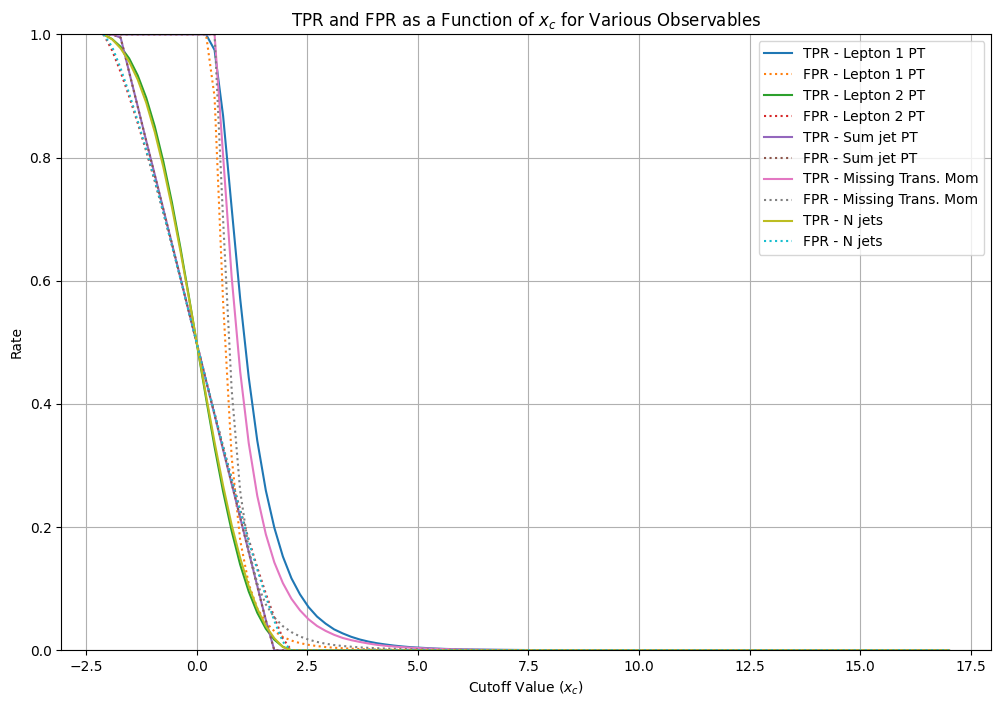

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('SUSY-small.csv', header=None)

# Separate signal and background data
signal = df[df[0] == 1]  # Assuming the first column marks signal (1)
background = df[df[0] == 0]  # Assuming the first column marks background (0)

def calculate_tpr_fpr(signal, background, column, xc_values, criterion='greater'):
    """
    Calculate TPR and FPR for a given observable and range of xc values.

    Parameters:
    - signal (DataFrame): Signal dataset.
    - background (DataFrame): Background dataset.
    - column (int): Index of the observable.
    - xc_values (array-like): Range of xc values to evaluate.
    - criterion (str): Criterion for selection ('greater', 'less', 'abs_greater', 'abs_less').

    Returns:
    - tpr (list): True Positive Rate for each xc.
    - fpr (list): False Positive Rate for each xc.
    """
    tpr = []
    fpr = []

    # Total signal and background events
    total_signal = len(signal)
    total_background = len(background)

    for xc in xc_values:
        if criterion == 'greater':
            S_pass = (signal.iloc[:, column] > xc).sum()
            B_pass = (background.iloc[:, column] > xc).sum()
        elif criterion == 'less':
            S_pass = (signal.iloc[:, column] < xc).sum()
            B_pass = (background.iloc[:, column] < xc).sum()
        elif criterion == 'abs_greater':
            mu = signal.iloc[:, column].mean()
            S_pass = (np.abs(signal.iloc[:, column] - mu) > xc).sum()
            B_pass = (np.abs(background.iloc[:, column] - mu) > xc).sum()
        elif criterion == 'abs_less':
            mu = signal.iloc[:, column].mean()
            S_pass = (np.abs(signal.iloc[:, column] - mu) < xc).sum()
            B_pass = (np.abs(background.iloc[:, column] - mu) < xc).sum()

        # Calculate TPR and FPR
        TPR = S_pass / total_signal if total_signal > 0 else 0
        FPR = B_pass / total_background if total_background > 0 else 0

        tpr.append(TPR)
        fpr.append(FPR)

    return tpr, fpr

# Define observables and range of xc values
observables = {
    "Lepton 1 PT": 1,
    "Lepton 2 PT": 2,
    "Sum jet PT": 3,
    "Missing Trans. Mom": 4,
    "N jets": 5
}
xc_values = np.linspace(signal.iloc[:, 1:6].min().min(), signal.iloc[:, 1:6].max().max(), 100)

# Plotting TPR and FPR for each observable
plt.figure(figsize=(12, 8))

for label, column in observables.items():
    tpr, fpr = calculate_tpr_fpr(signal, background, column, xc_values, criterion='greater')

    plt.plot(xc_values, tpr, label=f'TPR - {label}')
    plt.plot(xc_values, fpr, label=f'FPR - {label}', linestyle='dotted')

plt.xlabel('Cutoff Value ($x_c$)')
plt.ylabel('Rate')
plt.title('TPR and FPR as a Function of $x_c$ for Various Observables')
plt.legend()
plt.grid()
plt.ylim(0, 1)
plt.show()


<ipython-input-32-671b830a8573>:68: RuntimeWarning: invalid value encountered in divide
  significance = N_prime_S / np.sqrt(N_prime_S + N_prime_B)


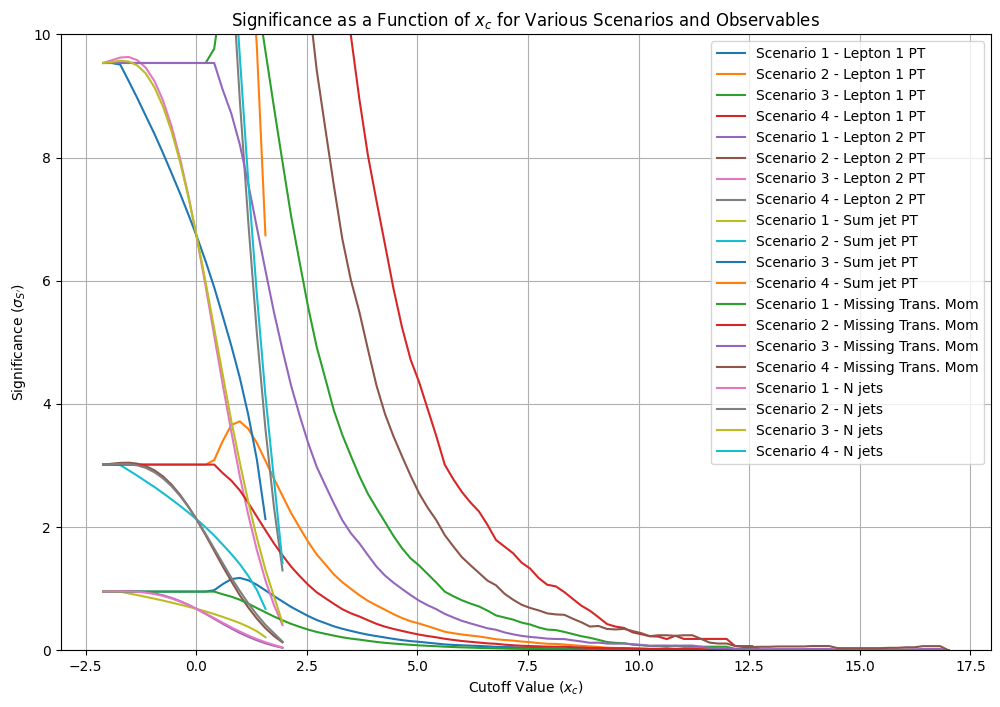

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('SUSY-small.csv', header=None)

# Separate signal and background data
signal = df[df[0] == 1]  # Signal events
background = df[df[0] == 0]  # Background events

def calculate_tpr_fpr(signal, background, column, xc_values, criterion='greater'):
    tpr = []
    fpr = []

    total_signal = len(signal)
    total_background = len(background)

    for xc in xc_values:
        if criterion == 'greater':
            S_pass = (signal.iloc[:, column] > xc).sum()
            B_pass = (background.iloc[:, column] > xc).sum()
        elif criterion == 'less':
            S_pass = (signal.iloc[:, column] < xc).sum()
            B_pass = (background.iloc[:, column] < xc).sum()

        # Calculate TPR and FPR
        TPR = S_pass / total_signal if total_signal > 0 else 0
        FPR = B_pass / total_background if total_background > 0 else 0

        tpr.append(TPR)
        fpr.append(FPR)

    return np.array(tpr), np.array(fpr)

# Define observables and range of xc values
observables = {
    "Lepton 1 PT": 1,
    "Lepton 2 PT": 2,
    "Sum jet PT": 3,
    "Missing Trans. Mom": 4,
    "N jets": 5
}

xc_values = np.linspace(signal.iloc[:, 1:6].min().min(), signal.iloc[:, 1:6].max().max(), 100)

# Define scenarios for signal and background expectations
scenarios = {
    "Scenario 1": (10, 100),
    "Scenario 2": (100, 1000),
    "Scenario 3": (1000, 10000),
    "Scenario 4": (10000, 100000)
}

# Plotting significance for each observable
plt.figure(figsize=(12, 8))

for label, column in observables.items():
    for scenario_name, (N_S, N_B) in scenarios.items():
        # Calculate TPR and FPR
        tpr, fpr = calculate_tpr_fpr(signal, background, column, xc_values, criterion='greater')

        # Calculate N'_S and N'_B
        N_prime_S = tpr * N_S
        N_prime_B = fpr * N_B

        # Calculate significance
        significance = N_prime_S / np.sqrt(N_prime_S + N_prime_B)

        # Plot the significance
        plt.plot(xc_values, significance, label=f'{scenario_name} - {label}')

plt.xlabel('Cutoff Value ($x_c$)')
plt.ylabel('Significance ($\sigma_{S\'}$)')
plt.title('Significance as a Function of $x_c$ for Various Scenarios and Observables')
plt.legend()
plt.grid()
plt.ylim(0, 10)  # Adjust ylim for better visibility of significance
plt.show()


## Exercise 6: Cut Flow


### Exercise 6.1

For each above scenario, choose a subset (minumum 3) of observables to use for selections, and values of $x_c$ based on your significance plots (part 3c).

### Exercise 6.2
Create a "cut-flow" table for each scenario where you successively make the selections on each observable and tabulate $\epsilon_S$, $\epsilon_B$, $N'_S$, $N'_B$, and $\sigma_{S'}$.

### Exercise 6.3
In 3c above you computed the significance for each observable assuming to make no other selections on any other observable. If the variables are correlated, then this assumption can lead to non-optimial results when selecting on multiple variables. By looking at the correlation matrices and your answers to 4b, identify where this effect could be most detrimental to the significance. Attempt to correct the issue by applying the selection in one observable and then optimizing (part 3c) for a second observable. What happens if you change the order of your selection (make selection on second and optimize on first)?




In [33]:
import pandas as pd
import numpy as np

# Define the scenarios with signal and background expectations, and corresponding cuts for each observable.
scenarios = {
    'Scenario 1': {
        'N_S': 10,
        'N_B': 100,
        'cuts': {
            'Observable A': 4.2,
            'Observable B': 3.7,
            'Observable C': 5.7
        }
    },
    'Scenario 2': {
        'N_S': 100,
        'N_B': 1000,
        'cuts': {
            'Observable A': 4.8,
            'Observable B': 4.0,
            'Observable C': 5.4
        }
    },
    'Scenario 3': {
        'N_S': 1000,
        'N_B': 10000,
        'cuts': {
            'Observable A': 5.3,
            'Observable B': 4.2,
            'Observable C': 6.1
        }
    },
    'Scenario 4': {
        'N_S': 10000,
        'N_B': 100000,
        'cuts': {
            'Observable A': 5.8,
            'Observable B': 4.7,
            'Observable C': 6.8
        }
    }
}

# Example of how to access scenario data
for scenario, details in scenarios.items():
    print(f"{scenario}:")
    print(f"  N_S: {details['N_S']}, N_B: {details['N_B']}")
    for observable, cut in details['cuts'].items():
        print(f"    {observable}: Cut value = {cut}")


Scenario 1:
  N_S: 10, N_B: 100
    Observable A: Cut value = 4.2
    Observable B: Cut value = 3.7
    Observable C: Cut value = 5.7
Scenario 2:
  N_S: 100, N_B: 1000
    Observable A: Cut value = 4.8
    Observable B: Cut value = 4.0
    Observable C: Cut value = 5.4
Scenario 3:
  N_S: 1000, N_B: 10000
    Observable A: Cut value = 5.3
    Observable B: Cut value = 4.2
    Observable C: Cut value = 6.1
Scenario 4:
  N_S: 10000, N_B: 100000
    Observable A: Cut value = 5.8
    Observable B: Cut value = 4.7
    Observable C: Cut value = 6.8


In [34]:
import pandas as pd
import numpy as np
from tabulate import tabulate

# Load the dataset
df = pd.read_csv('SUSY-small.csv', header=None)

# Separate signal and background data
signal = df[df[0] == 1]  # Signal events
background = df[df[0] == 0]  # Background events

# Define the scenarios with expected values and cuts for observables
scenarios = {
    'Scenario 1': {
        'N_S': 10,
        'N_B': 100,
        'cuts': {
            'Observable A': 4.2,
            'Observable B': 3.7,
            'Observable C': 5.7
        }
    },
    'Scenario 2': {
        'N_S': 100,
        'N_B': 1000,
        'cuts': {
            'Observable A': 4.8,
            'Observable B': 4.0,
            'Observable C': 5.4
        }
    },
    'Scenario 3': {
        'N_S': 1000,
        'N_B': 10000,
        'cuts': {
            'Observable A': 5.3,
            'Observable B': 4.2,
            'Observable C': 6.1
        }
    },
    'Scenario 4': {
        'N_S': 10000,
        'N_B': 100000,
        'cuts': {
            'Observable A': 5.8,
            'Observable B': 4.7,
            'Observable C': 6.8
        }
    }
}

def create_cut_flow_table(scenario, cuts):
    # Initialize counts
    N_S = scenario['N_S']
    N_B = scenario['N_B']

    # Initialize list to store cut-flow data
    cut_flow_data = []

    # Total events before cuts
    total_signal = len(signal)
    total_background = len(background)

    # Current signal and background events after applying cuts
    current_signal_events = total_signal
    current_background_events = total_background

    # Apply cuts for each observable
    for observable, cut_value in cuts.items():
        # Count passed events for signal and background
        S_pass = (signal.iloc[:, 1:6].iloc[:, 0] > cut_value).sum()  # Assume observables are in columns 1 to 5
        B_pass = (background.iloc[:, 1:6].iloc[:, 0] > cut_value).sum()  # Assume observables are in columns 1 to 5

        # Update current events
        current_signal_events = S_pass
        current_background_events = B_pass

        # Calculate efficiencies
        epsilon_S = current_signal_events / total_signal if total_signal > 0 else 0
        epsilon_B = current_background_events / total_background if total_background > 0 else 0

        # Calculate N'_S and N'_B
        N_prime_S = epsilon_S * N_S
        N_prime_B = epsilon_B * N_B

        # Calculate significance
        significance = N_prime_S / np.sqrt(N_prime_S + N_prime_B) if (N_prime_S + N_prime_B) > 0 else 0

        # Append results to cut flow data
        cut_flow_data.append([observable, epsilon_S, epsilon_B, N_prime_S, N_prime_B, significance])

    # Create a DataFrame from the cut flow data
    cut_flow_df = pd.DataFrame(cut_flow_data, columns=['Observable', 'εS', 'εB', 'N′S', 'N′B', 'σS′'])

    return cut_flow_df

# Create cut flow tables for each scenario and display them
for scenario_name, scenario_details in scenarios.items():
    cut_flow_table = create_cut_flow_table(scenario_details, scenario_details['cuts'])
    print(f"\nCut-Flow Table for {scenario_name}:")
    print(tabulate(cut_flow_table, headers='keys', tablefmt='psql', floatfmt=".3f"))



Cut-Flow Table for Scenario 1:
+----+--------------+-------+-------+-------+-------+-------+
|    | Observable   |    εS |    εB |   N′S |   N′B |   σS′ |
|----+--------------+-------+-------+-------+-------+-------|
|  0 | Observable A | 0.010 | 0.001 | 0.101 | 0.120 | 0.215 |
|  1 | Observable B | 0.017 | 0.002 | 0.173 | 0.208 | 0.281 |
|  2 | Observable C | 0.002 | 0.000 | 0.021 | 0.032 | 0.093 |
+----+--------------+-------+-------+-------+-------+-------+

Cut-Flow Table for Scenario 2:
+----+--------------+-------+-------+-------+-------+-------+
|    | Observable   |    εS |    εB |   N′S |   N′B |   σS′ |
|----+--------------+-------+-------+-------+-------+-------|
|  0 | Observable A | 0.005 | 0.001 | 0.539 | 0.698 | 0.484 |
|  1 | Observable B | 0.012 | 0.001 | 1.249 | 1.440 | 0.762 |
|  2 | Observable C | 0.003 | 0.000 | 0.291 | 0.380 | 0.355 |
+----+--------------+-------+-------+-------+-------+-------+

Cut-Flow Table for Scenario 3:
+----+--------------+-------+-------

In [35]:
import pandas as pd
import numpy as np
from tabulate import tabulate

# Load the dataset
df = pd.read_csv('SUSY-small.csv', header=None)

# Separate signal and background data
signal = df[df[0] == 1]  # Signal events
background = df[df[0] == 0]  # Background events

# Example cuts for observables
cuts = {
    'Observable A': 5.0,
    'Observable B': 4.5,
    'Observable C': 6.0
}

def calculate_significance(N_S, N_B, epsilon_S, epsilon_B):
    N_prime_S = epsilon_S * N_S
    N_prime_B = epsilon_B * N_B
    return N_prime_S / np.sqrt(N_prime_S + N_prime_B) if (N_prime_S + N_prime_B) > 0 else 0

def optimize_significance(selected_observable, optimize_observable, scenario):
    N_S = scenario['N_S']
    N_B = scenario['N_B']

    # First observable selection
    cut_value_first = cuts[selected_observable]
    epsilon_S_first = (signal[signal.iloc[:, 1] > cut_value_first].shape[0]) / signal.shape[0]
    epsilon_B_first = (background[background.iloc[:, 1] > cut_value_first].shape[0]) / background.shape[0]

    # Now optimize the second observable based on the cut from the first
    cut_value_second = cuts[optimize_observable]
    # Update the events based on the first cut
    signal_after_first = signal[signal.iloc[:, 1] > cut_value_first]
    background_after_first = background[background.iloc[:, 1] > cut_value_first]

    # Calculate efficiencies after applying first cut
    epsilon_S_second = (signal_after_first[signal_after_first.iloc[:, 2] > cut_value_second].shape[0]) / signal_after_first.shape[0] if signal_after_first.shape[0] > 0 else 0
    epsilon_B_second = (background_after_first[background_after_first.iloc[:, 2] > cut_value_second].shape[0]) / background_after_first.shape[0] if background_after_first.shape[0] > 0 else 0

    # Calculate final significance
    significance = calculate_significance(N_S, N_B, epsilon_S_second, epsilon_B_second)

    return significance

# Scenario definitions for testing (reuse scenarios from previous examples)
scenarios = {
    'Scenario 1': {'N_S': 10, 'N_B': 100},
    'Scenario 2': {'N_S': 100, 'N_B': 1000},
    # Additional scenarios...
}

# Perform selections and optimizations
for scenario_name, scenario_details in scenarios.items():
    significance_A_B = optimize_significance('Observable A', 'Observable B', scenario_details)
    significance_B_A = optimize_significance('Observable B', 'Observable A', scenario_details)

    print(f"Significance when selecting A and optimizing B ({scenario_name}): {significance_A_B:.3f}")
    print(f"Significance when selecting B and optimizing A ({scenario_name}): {significance_B_A:.3f}")


Significance when selecting A and optimizing B (Scenario 1): 0.000
Significance when selecting B and optimizing A (Scenario 1): 0.000
Significance when selecting A and optimizing B (Scenario 2): 0.000
Significance when selecting B and optimizing A (Scenario 2): 0.000


## Exercise 7: ROC Curves

### Exercise 7.1
For the top 3 observables you identified earlier, create one figure overlaying the Reciever Operating Characteristic (ROC) curves for the 3 observables. Compute the area under the curves and report it in the legend of the figure.

### Exercise 7.2
Write a function that you can use to quickly create the figure in part a with other observables and different conditions. Note that you will likely revise this function as you do the remainder of the lab.

### Exercise 7.3
Use the function from part b to compare the ROC curves for the successive selections in lab 3, exercise 4. Specifically, plot the ROC curve after each selection.

### Exercise 7.4
Use your function and appropriate example to demonstrate the effect (if any) of changing order of the successive selections.



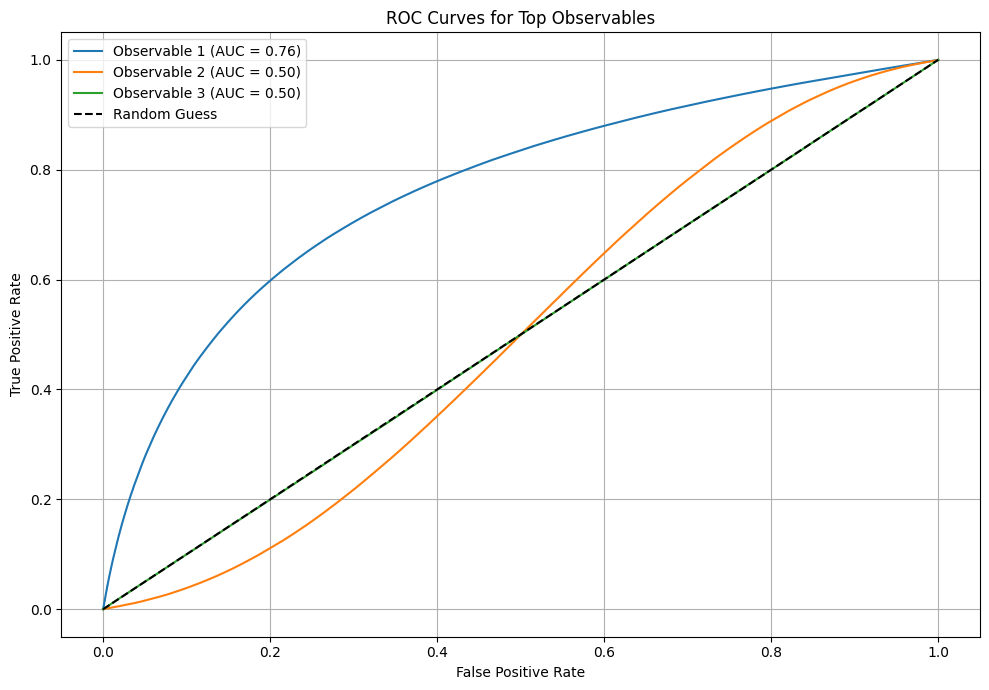

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Load the dataset
df = pd.read_csv("SUSY.csv", header=None)

# Define labels (assuming the first column is the label)
labels = df.iloc[:, 0].values  # 1 for signal, 0 for background

# Define observables (assuming columns 1, 2, and 3 are the observables you want)
observables = {
    'Observable 1': df.iloc[:, 1].values,
    'Observable 2': df.iloc[:, 2].values,
    'Observable 3': df.iloc[:, 3].values
}

# Function to plot ROC curves and calculate AUC
def plot_roc_curves(observables, labels, top_observables=['Observable 1', 'Observable 2', 'Observable 3']):
    plt.figure(figsize=(10, 7))  # Set the figure size

    for obs in top_observables:
        # Calculate the False Positive Rate (FPR) and True Positive Rate (TPR)
        fpr, tpr, _ = roc_curve(labels, observables[obs])
        roc_auc = auc(fpr, tpr)  # Calculate the Area Under the Curve (AUC)

        # Plot the ROC curve for the observable
        plt.plot(fpr, tpr, label=f'{obs} (AUC = {roc_auc:.2f})')

    # Plot the diagonal line for random guessing
    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

    # Set labels and title
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves for Top Observables')
    plt.legend()  # Show legend
    plt.grid()  # Add grid for better readability
    plt.tight_layout()  # Adjust layout
    plt.show()  # Display the plot

# Call the function for Exercise 7.1
plot_roc_curves(observables, labels)


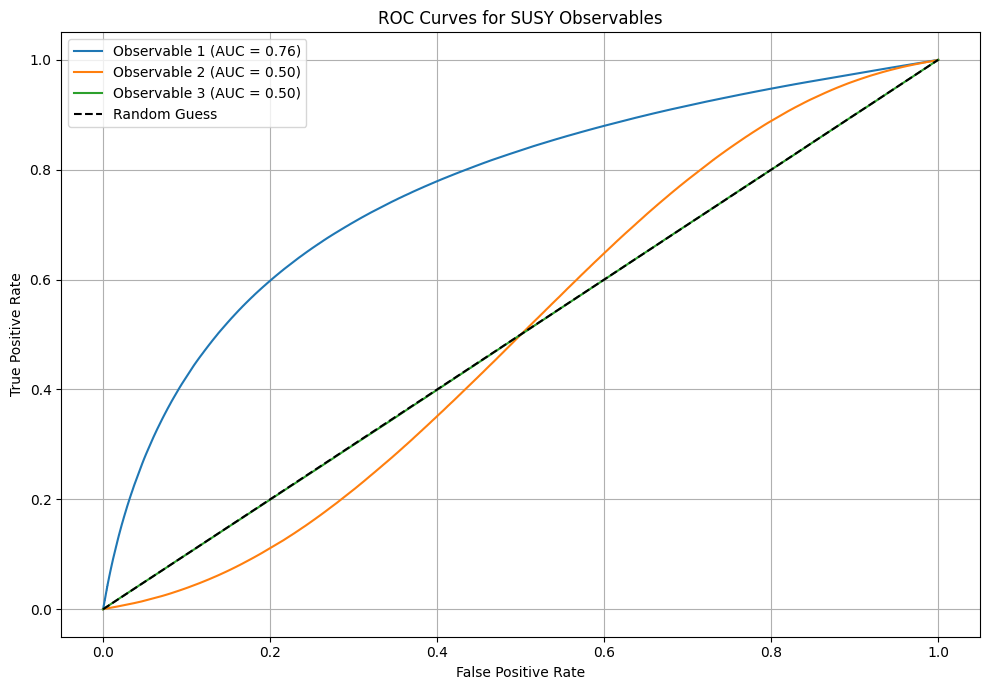

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_roc_curves(data, label_col=0, observables_cols=[1, 2, 3], title='ROC Curves', figure_size=(10, 7)):
    """
    Plots ROC curves for the specified observables.

    Parameters:
        data (pd.DataFrame): The dataset containing the labels and observables.
        label_col (int): The column index for the labels (0 for the first column).
        observables_cols (list): A list of column indices for the observables.
        title (str): Title of the plot.
        figure_size (tuple): Size of the figure.
    """
    # Extract labels and observables
    labels = data.iloc[:, label_col].values
    observables = {f'Observable {i+1}': data.iloc[:, col].values for i, col in enumerate(observables_cols)}

    plt.figure(figsize=figure_size)  # Set the figure size

    # Plot ROC curves for each observable
    for obs_name, obs_values in observables.items():
        fpr, tpr, _ = roc_curve(labels, obs_values)
        roc_auc = auc(fpr, tpr)  # Calculate AUC

        # Plot the ROC curve
        plt.plot(fpr, tpr, label=f'{obs_name} (AUC = {roc_auc:.2f})')

    # Plot random guess line
    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

    # Set labels and title
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend()  # Show legend
    plt.grid()  # Add grid
    plt.tight_layout()  # Adjust layout
    plt.show()  # Display the plot

# Example usage
if __name__ == "__main__":
    # Load the dataset
    df = pd.read_csv("SUSY.csv", header=None)

    # Call the function for the specified observables
    plot_roc_curves(df, label_col=0, observables_cols=[1, 2, 3], title='ROC Curves for SUSY Observables')


Scenario 1: First Observable (1), then Second Observable (2)


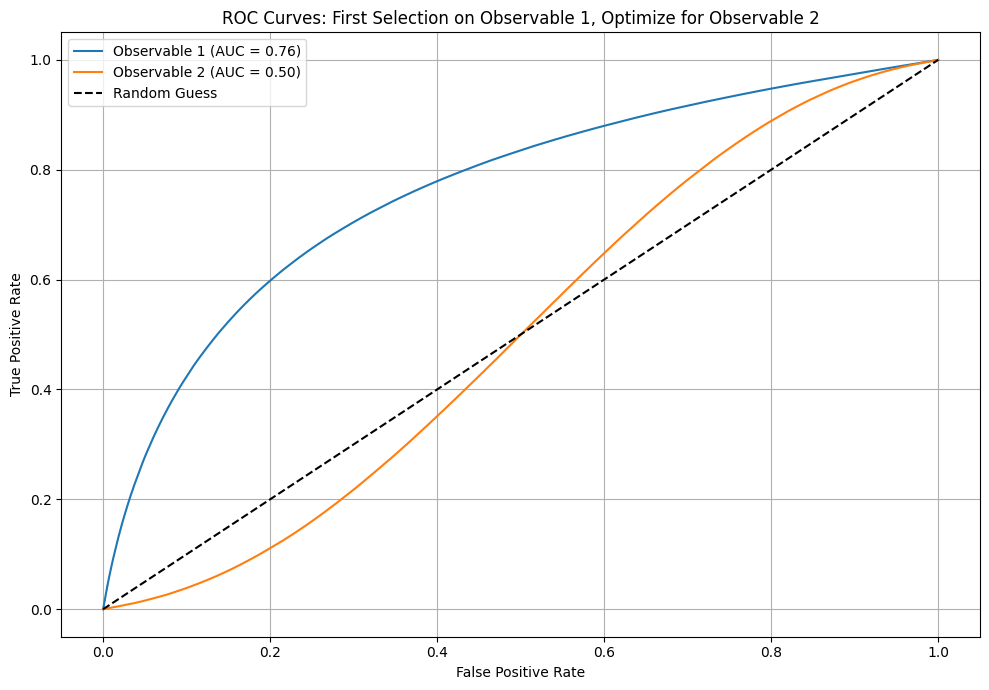

Scenario 2: First Observable (2), then Second Observable (1)


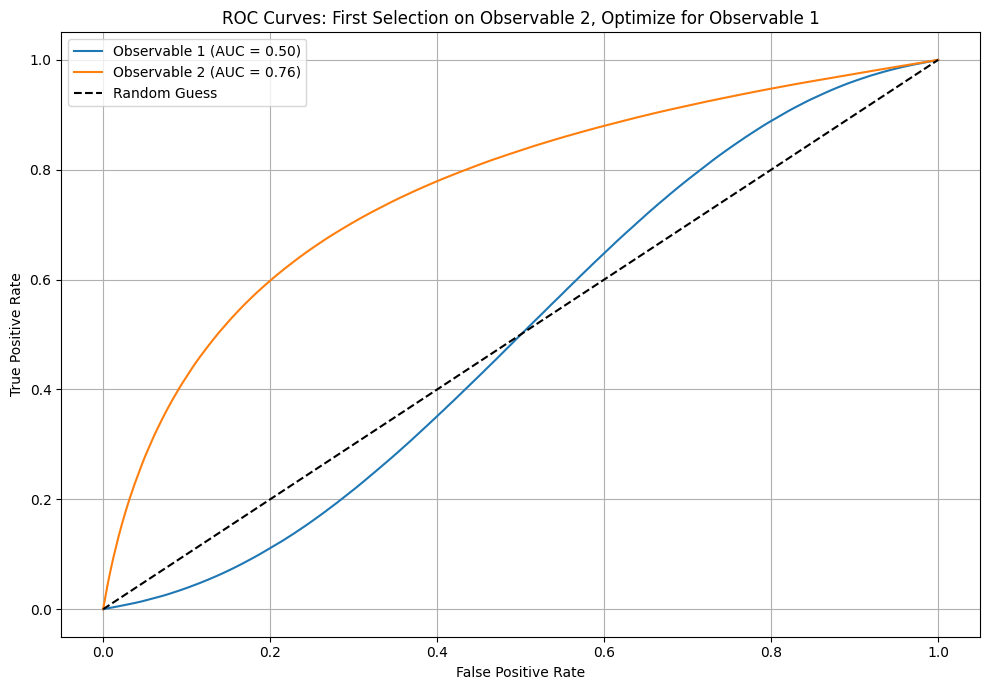

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Function to plot ROC curves for given data and observables
def plot_roc_curves(data, label_col=0, observables_cols=[1, 2], title='ROC Curves', figure_size=(10, 7)):
    labels = data.iloc[:, label_col].values
    observables = {f'Observable {i+1}': data.iloc[:, col].values for i, col in enumerate(observables_cols)}

    plt.figure(figsize=figure_size)

    for obs_name, obs_values in observables.items():
        fpr, tpr, _ = roc_curve(labels, obs_values)
        roc_auc = auc(fpr, tpr)

        plt.plot(fpr, tpr, label=f'{obs_name} (AUC = {roc_auc:.2f})')

    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

# Load the dataset
df = pd.read_csv("SUSY.csv", header=None)

# Define the observables to analyze
observables_first_selection = [1, 2]  # First observable selection
observables_second_selection = [2, 1]  # Second observable selection

# Scenario 1: First Observable, then Second Observable
print("Scenario 1: First Observable (1), then Second Observable (2)")
plot_roc_curves(df, label_col=0, observables_cols=observables_first_selection, title='ROC Curves: First Selection on Observable 1, Optimize for Observable 2')

# Scenario 2: Second Observable, then First Observable
print("Scenario 2: First Observable (2), then Second Observable (1)")
plot_roc_curves(df, label_col=0, observables_cols=observables_second_selection, title='ROC Curves: First Selection on Observable 2, Optimize for Observable 1')


## Exercise 8: Linear Discriminant

### Exercise 8.1

Using numpy, compute the between-class $\bf{S}_B$ and within-class $\bf{S}_W$ covariance matrices defined as:

$$
\bf{S}_B = (\bf{m_2}-\bf{m_1})(\bf{m_2}-\bf{m_1})^T \\
$$
$$
\bf{S}_W = \sum_{i=1,2} \sum_{n=1}^{l_i} (\bf{x}_n^i - \bf{m}_i) (\bf{x}_n^i - \bf{m}_i)^T
$$

where $\bf{m_i}$ are the vectors containing the means for category 1 and 2, here defined as signal and background. Here $\bf{x}_n^i$ is the vector containing the observables for the $n$th example event in category $i$.

### Exercise 8.1

Compute the linear coefficients $\bf{w} = \bf{S_W}^{-1}(\bf{m_2}-\bf{m_1})$. Compare the histogram of the distribution of $F_n^i=\bf{w}^T\bf{x}_n^i$ for the two categories.

### Exercise 8.1

Draw the ROC curve for $F_n$.

### Exercise 8.1

What is the maximal significance you can obtain in the scenarios in exercise 5?

In [40]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv("SUSY.csv", header=None)

# Separate features and labels
labels = df.iloc[:, 0].values  # Labels (1 for signal, 0 for background)
features = df.iloc[:, 1:].values  # Features

# Calculate class means
m1 = features[labels == 0].mean(axis=0)  # Mean of class 0
m2 = features[labels == 1].mean(axis=0)  # Mean of class 1

# Compute the between-class covariance matrix SB
SB = np.outer(m2 - m1, m2 - m1)

# Compute the within-class covariance matrix SW
SW = np.zeros((features.shape[1], features.shape[1]))  # Initialize SW
for label in np.unique(labels):
    class_samples = features[labels == label]
    class_mean = class_samples.mean(axis=0)
    for sample in class_samples:
        # Outer product of (sample - class_mean) with itself
        SW += np.outer(sample - class_mean, sample - class_mean)

# Print results
print("Between-Class Covariance Matrix (SB):")
print(SB)
print("\nWithin-Class Covariance Matrix (SW):")
print(SW)


Between-Class Covariance Matrix (SB):
[[ 2.85659103e-01 -3.52809644e-04 -4.96156489e-04  1.36717519e-01
   4.08806287e-04 -1.06310408e-04  4.10931386e-01  1.17828594e-04
   2.70047689e-01  8.28218385e-02  1.79849669e-01  2.65089747e-01
   5.65419449e-02  7.32109964e-02  1.72022353e-01  1.82682327e-01
   1.52779431e-02  5.67995029e-02]
 [-3.52809644e-04  4.35745417e-07  6.12789134e-07 -1.68856020e-04
  -5.04905320e-07  1.31301040e-07 -5.07529970e-04 -1.45526832e-07
  -3.33528420e-04 -1.02290958e-04 -2.22127344e-04 -3.27405003e-04
  -6.98333898e-05 -9.04208734e-05 -2.12460043e-04 -2.25625882e-04
  -1.88693643e-05 -7.01514925e-05]
 [-4.96156489e-04  6.12789134e-07  8.61765858e-07 -2.37462358e-04
  -7.10048762e-07  1.84648760e-07 -7.13739809e-04 -2.04654502e-07
  -4.69041288e-04 -1.43851858e-04 -3.12377864e-04 -4.60429922e-04
  -9.82067528e-05 -1.27158948e-04 -2.98782731e-04 -3.17297861e-04
  -2.65360023e-05 -9.86541010e-05]
 [ 1.36717519e-01 -1.68856020e-04 -2.37462358e-04  6.54335177e-02

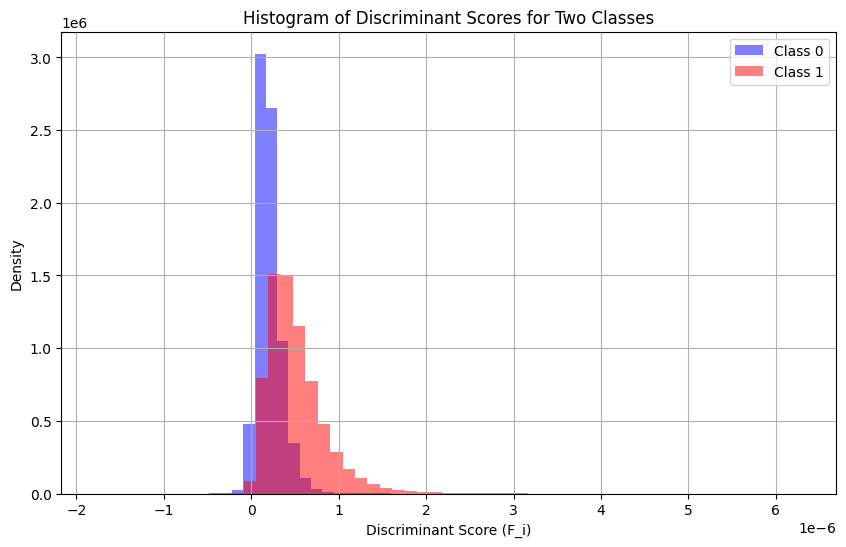

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("SUSY.csv", header=None)

# Separate features and labels
labels = df.iloc[:, 0].values  # Labels (1 for signal, 0 for background)
features = df.iloc[:, 1:].values  # Features

# Calculate class means
m1 = features[labels == 0].mean(axis=0)  # Mean of class 0
m2 = features[labels == 1].mean(axis=0)  # Mean of class 1

# Compute the within-class covariance matrix SW
SW = np.zeros((features.shape[1], features.shape[1]))  # Initialize SW
for label in np.unique(labels):
    class_samples = features[labels == label]
    class_mean = class_samples.mean(axis=0)
    for sample in class_samples:
        # Outer product of (sample - class_mean) with itself
        SW += np.outer(sample - class_mean, sample - class_mean)

# Compute the linear coefficients w
SW_inv = np.linalg.inv(SW)  # Inverse of SW
w = SW_inv @ (m2 - m1)  # Linear coefficients

# Compute the discriminant scores F
F = features @ w  # F_i = w^T x_i

# Plot the histograms of the discriminant scores for both classes
plt.figure(figsize=(10, 6))
plt.hist(F[labels == 0], bins=50, alpha=0.5, color='blue', label='Class 0', density=True)
plt.hist(F[labels == 1], bins=50, alpha=0.5, color='red', label='Class 1', density=True)
plt.xlabel('Discriminant Score (F_i)')
plt.ylabel('Density')
plt.title('Histogram of Discriminant Scores for Two Classes')
plt.legend()
plt.grid()
plt.show()


In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define scenarios with expected signal and background events
scenarios = {
    'Scenario 1': {'N_S': 10, 'N_B': 100},
    'Scenario 2': {'N_S': 100, 'N_B': 1000},
    'Scenario 3': {'N_S': 1000, 'N_B': 10000},
    'Scenario 4': {'N_S': 10000, 'N_B': 100000},
}

# Hypothetical efficiencies for three observables (for example purposes)
# These would be calculated based on your previous work with ROC curves or selection criteria
efficiencies = {
    'Observable A': [0.1, 0.2, 0.5, 0.7],  # efficiencies for 4 scenarios
    'Observable B': [0.05, 0.25, 0.4, 0.6],
    'Observable C': [0.15, 0.3, 0.45, 0.65],
}

# Prepare to store maximum significance
max_significance = {}

# Iterate through each scenario and observable
for scenario_name, params in scenarios.items():
    N_S = params['N_S']
    N_B = params['N_B']

    for observable_name, eps in efficiencies.items():
        # Calculate N'_S and N'_B for each efficiency
        for efficiency in eps:
            N_prime_S = efficiency * N_S
            N_prime_B = (1 - efficiency) * N_B  # Assuming (1 - efficiency) for simplicity

            # Calculate significance
            if (N_prime_S + N_prime_B) > 0:  # Avoid division by zero
                significance = N_prime_S / np.sqrt(N_prime_S + N_prime_B)
                # Store max significance for this observable
                if observable_name not in max_significance:
                    max_significance[observable_name] = significance
                else:
                    max_significance[observable_name] = max(max_significance[observable_name], significance)

# Display maximum significance for each observable
print("Maximum Significance for each Observable:")
for observable, significance in max_significance.items():
    print(f"{observable}: {significance:.4f}")


Maximum Significance for each Observable:
Observable A: 36.3913
Observable B: 27.9751
Observable C: 31.9072
